# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import pandas as pd

from utilities import *

# Load data
train_data = x_train, y_train = load_data("data/train.p")
valid_data = x_valid, y_valid = load_data("data/valid.p")
test_data = x_test, y_test = load_data("data/test.p")

# Load the sign names into a pandas DataFrame
sign_names = pd.read_csv("signnames.csv", index_col=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = x_train.shape[0]

# TODO: Number of validation examples
n_validation = x_valid.shape[0]

# TODO: Number of testing examples.
n_test = x_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = x_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
# Visualizations will be shown in the notebook.
%matplotlib inline

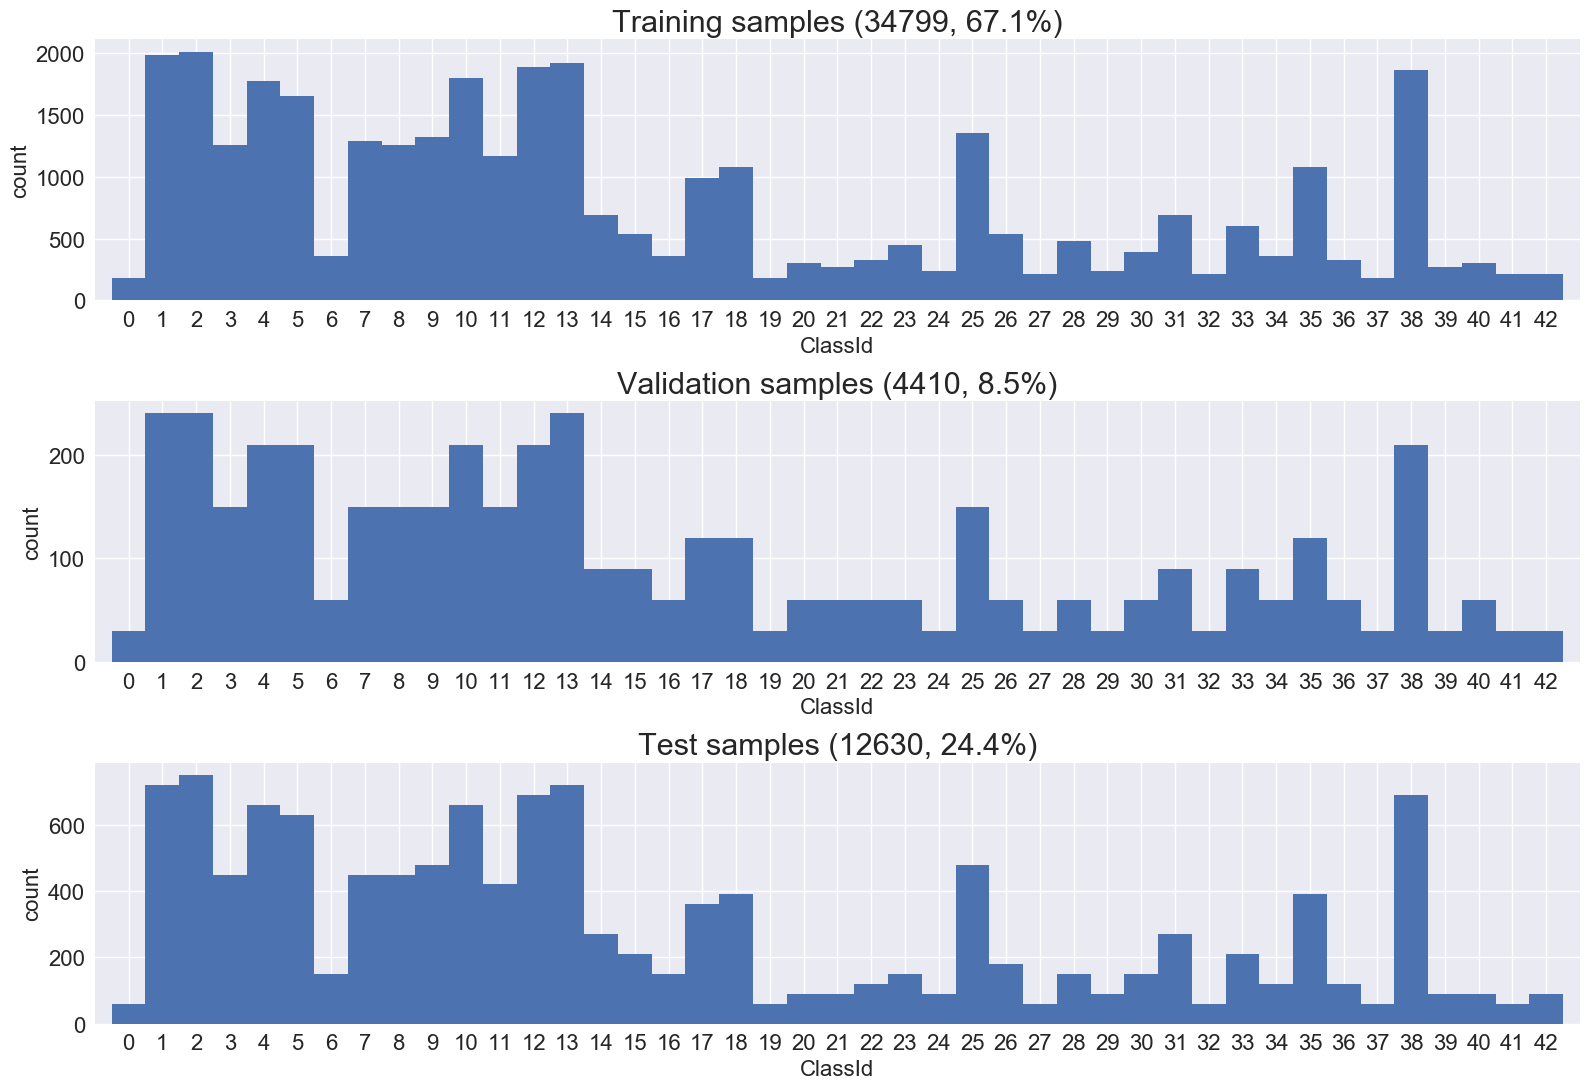

In [5]:
plot_distributions(y_train, y_valid, y_test)

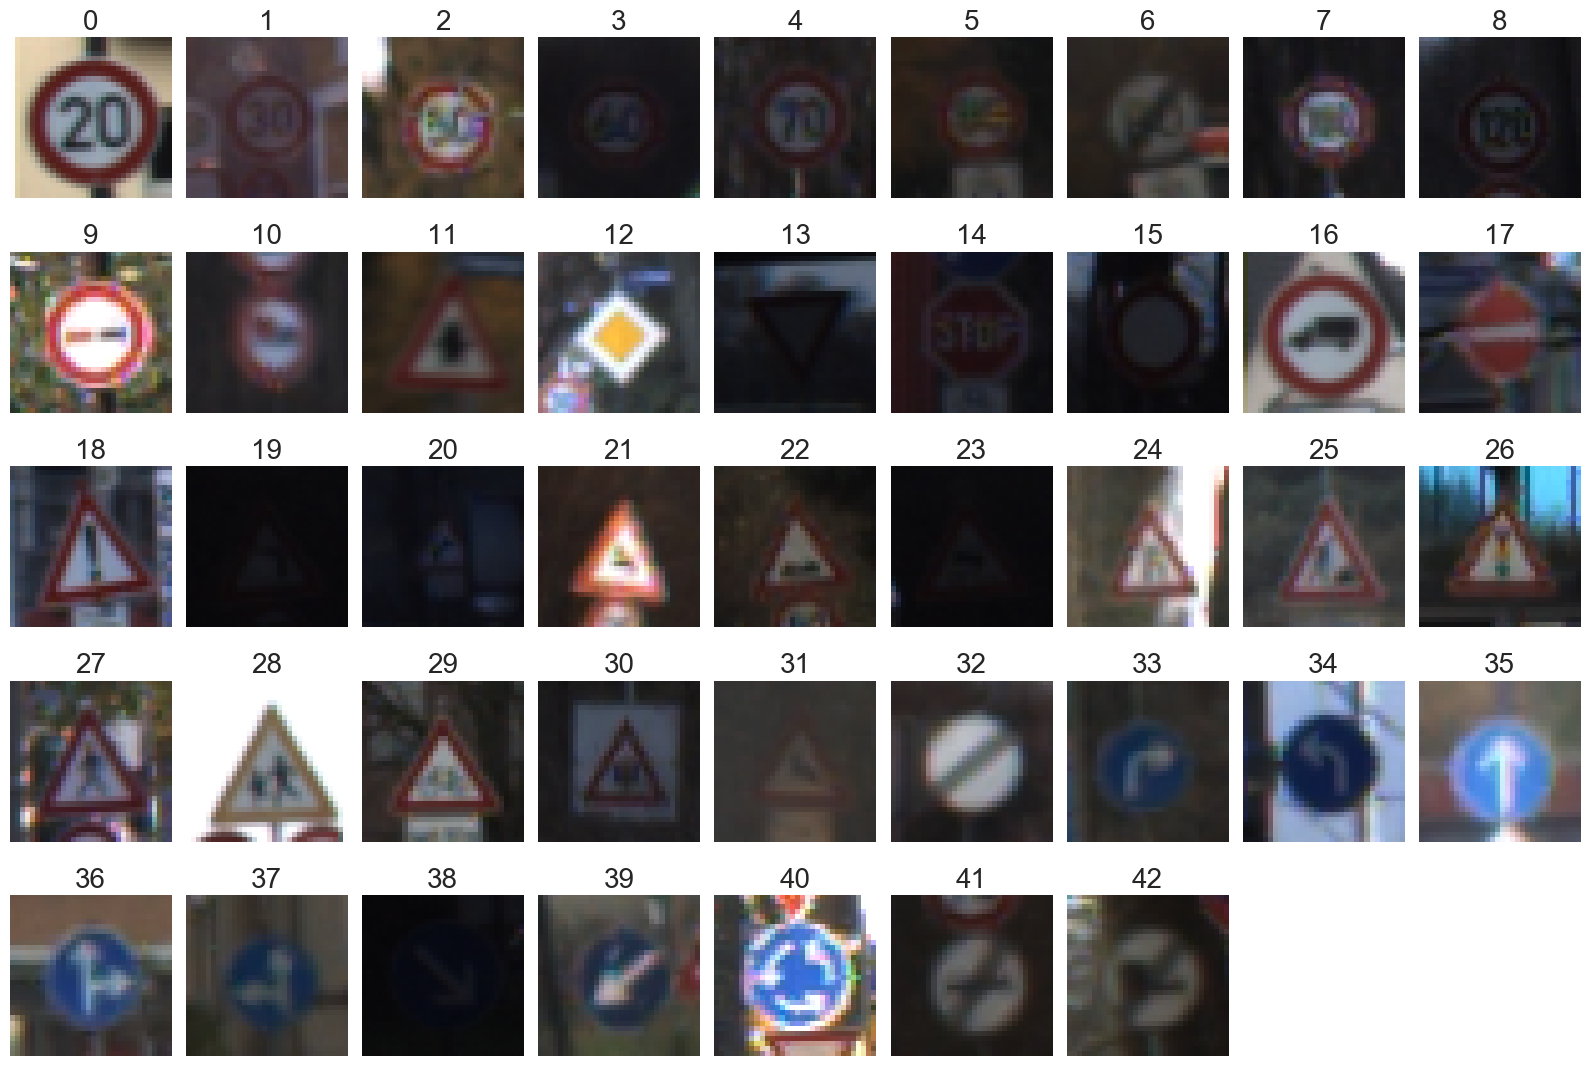

In [6]:
plot_images(x_train, y_train)

In [7]:
sign_names

SignName
ClassId                                                   
0                                     Speed limit (20km/h)
1                                     Speed limit (30km/h)
2                                     Speed limit (50km/h)
3                                     Speed limit (60km/h)
4                                     Speed limit (70km/h)
5                                     Speed limit (80km/h)
6                              End of speed limit (80km/h)
7                                    Speed limit (100km/h)
8                                    Speed limit (120km/h)
9                                               No passing
10            No passing for vehicles over 3.5 metric tons
11                   Right-of-way at the next intersection
12                                           Priority road
13                                                   Yield
14                                                    Stop
15                                             No vehicles
16                Vehicles over 3.5 metric tons prohibited
17                                                No entry
18                                         General caution
19                             Dangerous curve to the left
20                            Dangerous curve to the right
21                                            Double curve
22                                              Bumpy road
23                                           Slippery road
24                               Road narrows on the right
25                                               Road work
26                                         Traffic signals
27                                             Pedestrians
28                                       Children crossing
29                                       Bicycles crossing
30                                      Beware of ice/snow
31                                   Wild animals crossing
32                     End of all speed and passing limits
33                                        Turn right ahead
34                                         Turn left ahead
35                                              Ahead only
36                                    Go straight or right
37                                     Go straight or left
38                                              Keep right
39                                               Keep left
40                                    Roundabout mandatory
41                                       End of no passing
42       End of no passing by vehicles over 3.5 metric ...

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

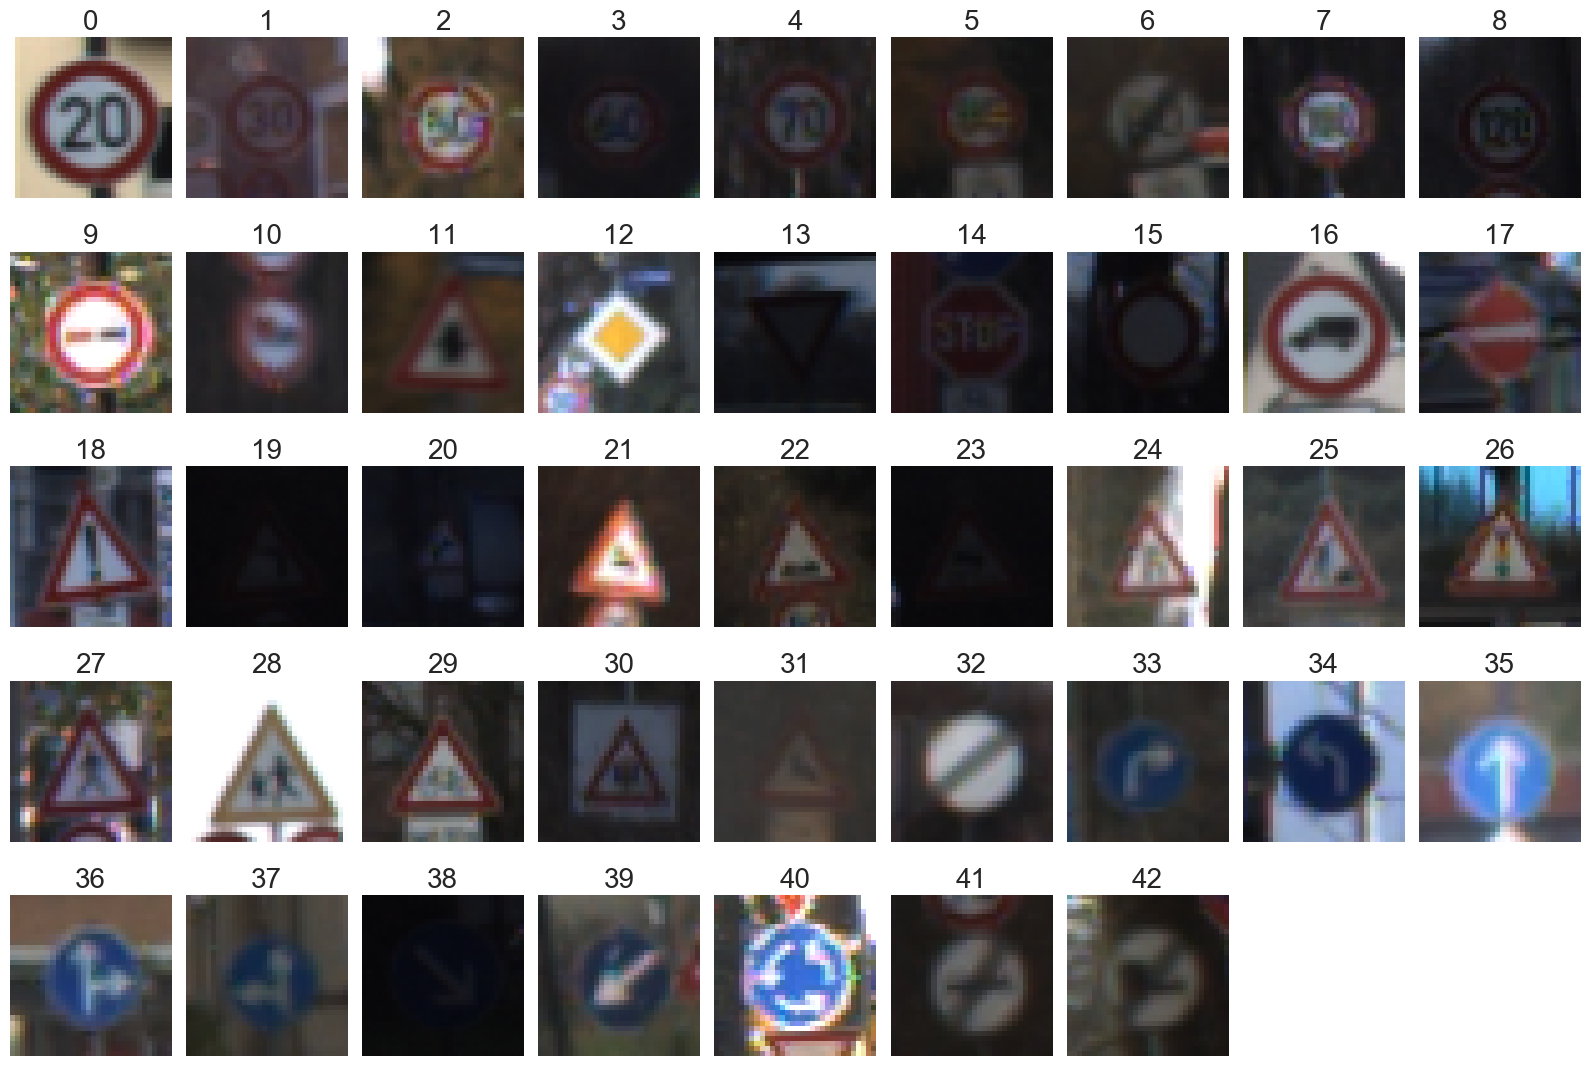

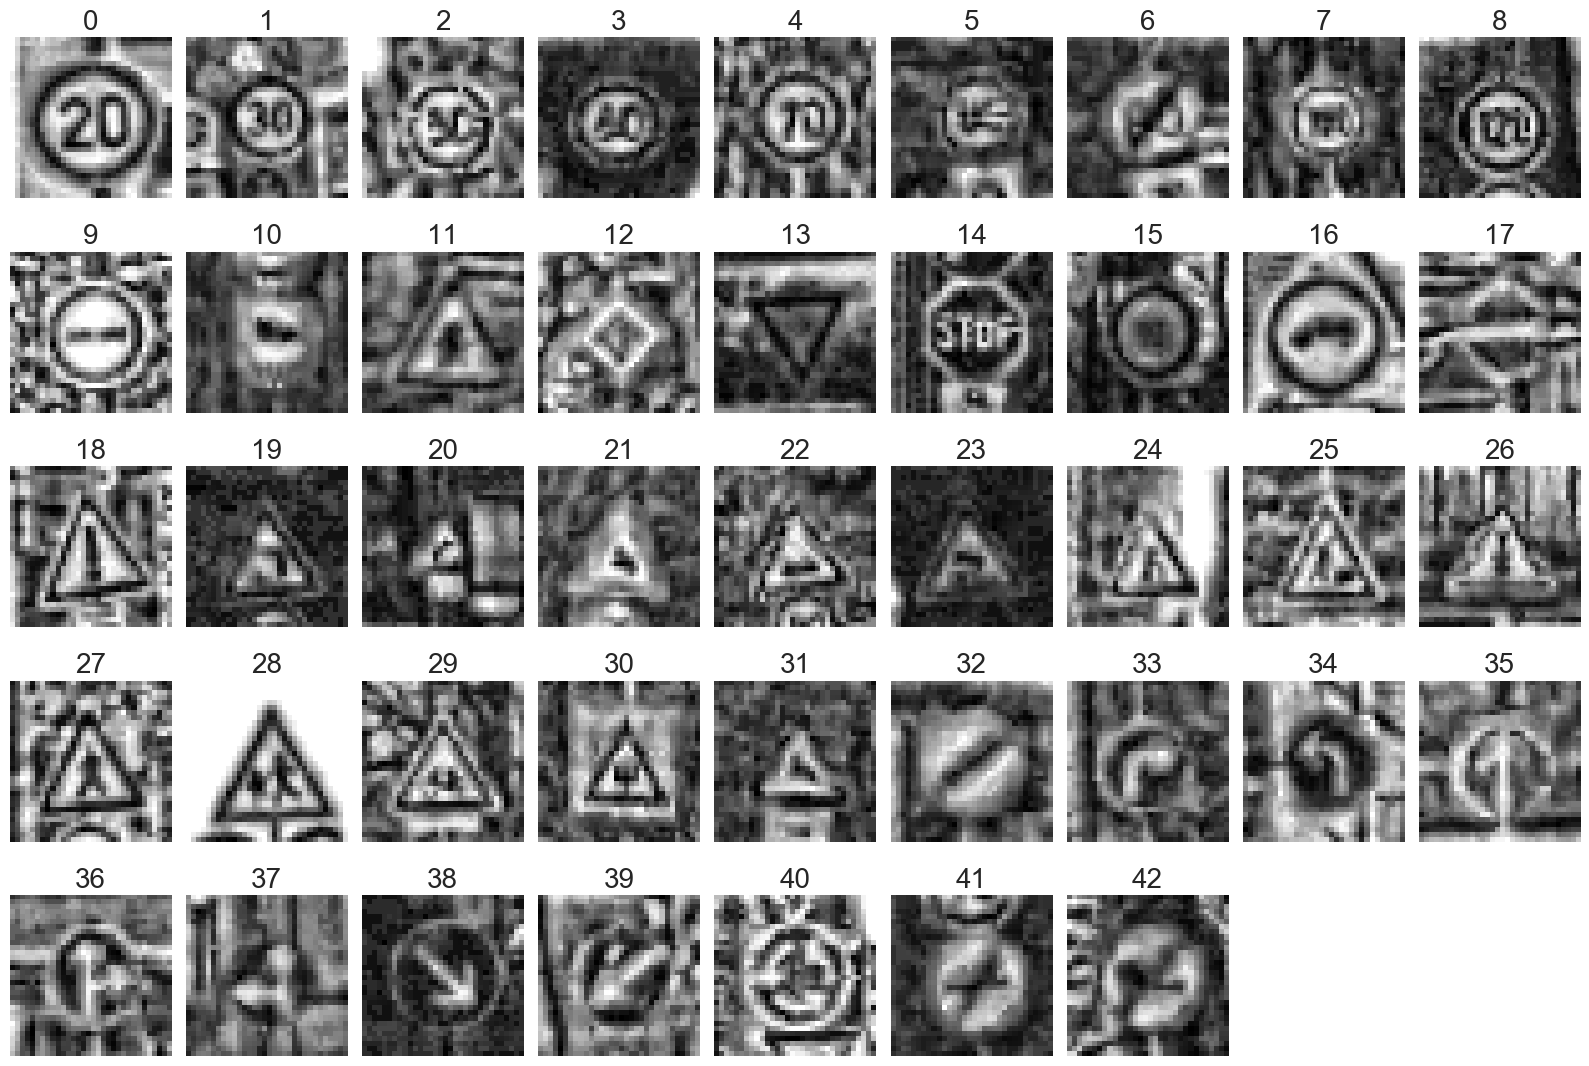

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def rgb2clahe(rgb_img, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Perform a contrast limited adaptive histogram equalization on given image.

    The clahe operation is performed on the grayscale version of the given rgb
    frame.

    Args:
        rgb_img: 
            current undistorted rgb frame
        clip_limit: 
            threshold for contrast limiting
        tile_grid_size: 
            size of the grid for the histogram equalization. The image will be 
            divided into equally sized rectangular tiles. tile_grid_size defines 
            the number of tiles in row and column.
    Returns:
        a gray image as result of the application of clahe
    """
    gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    gray_clahe = clahe.apply(gray)
    return gray_clahe

def preprocess(x, scale='std', clahe=True):
    """ Preprocess the input features.

    Args:
        x:
            batch of input images
        clahe:
            perform a contrast limited histogram equalization before scaling
        scale:
            'normalize' the data into a range of 0 and 1 or 'standardize' the
            data to zero mean and standard deviation 1

    Returns:
        The preprocessed input features, eventually reduced to single channel
    """

    if clahe is True:
        x = np.array([np.expand_dims(rgb2clahe(img), 2) for img in x])

    x = np.float32(x)

    if scale is not None and scale.lower() in ['norm', 'normalize']:
        x /= x.max()
    elif scale is not None and scale.lower() in ['std', 'standardize']:
        mean, std = x.mean(), x.std()
        x = (x - mean) / (std + np.finfo(float).eps)

    return x

plot_images(x_train, y_train)
plot_images(x_train, y_train, prep=True)

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from model import *
from layers import *

lenet5_rgb = [
    # in: 32 x 32 x 3
    Conv2d(name="conv1",
           shape=(5, 5, 3, 6),
           strides=[1, 1, 1, 1],
           padding="VALID",
           activation="Relu"),
    # 28 x 28 x 6
    Pool(name="pool1",
         shape=(1, 2, 2, 1),
         strides=(1, 2, 2, 1),
         padding="VALID",
         pooling_type="MAX"),
    # 14 x 14 x 6
    Conv2d(name="conv2",
           shape=(5, 5, 6, 16),
           strides=[1, 1, 1, 1],
           padding="VALID",
           activation="Relu"),
    # 10 x 10 x 16
    Pool(name="pool2",
         shape=(1, 2, 2, 1),
         strides=(1, 2, 2, 1),
         padding="VALID",
         pooling_type="MAX"),
    # 5 x 5 x 16 = 400
    Flatten(size=400),
    # 400
    Dense(name="fc3",
          shape=(400, 120),
          activation="Relu",
          dropout=True),
    # 120
    Dense(name="fc4",
          shape=(120, 84),
          activation="Relu",
          dropout=True),
    # 84
    Dense(name="fc5",
          shape=(84, 43),
          activation=None)]  # out: 43

Epoch 10/30:   Train Loss: 3.7002   Train Acc: 0.0498   Valid Acc: 0.0451
Epoch 20/30:   Train Loss: 3.1954   Train Acc: 0.1768   Valid Acc: 0.1567
Epoch 30/30:   Train Loss: 2.5000   Train Acc: 0.3713   Valid Acc: 0.3472


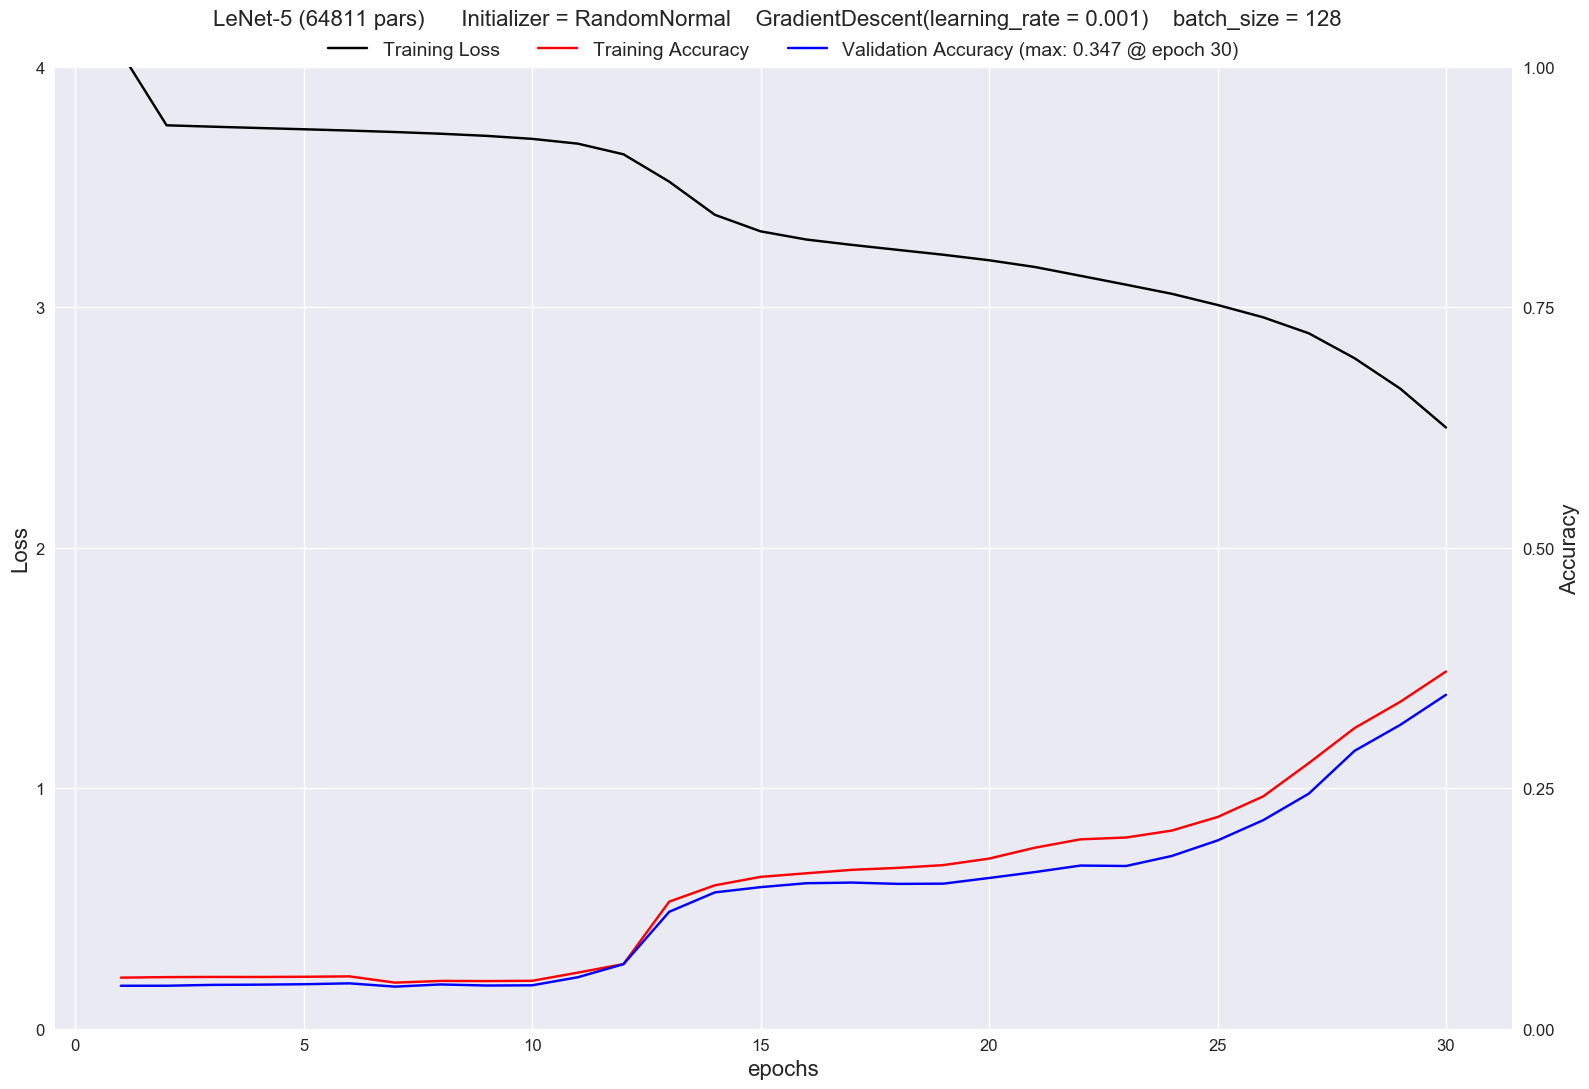

In [9]:
# Basic LeNet
flag = True
if flag:
    tf.reset_default_graph()
    lenet = Model('LeNet-5')
    lenet.compile(layers=lenet5_rgb,
                  initializer='RandomNormal',
                  activate_dropout=False)

    loss, train_acc, valid_acc = lenet.train(
        train_data=(x_train, y_train),
        valid_data=(x_valid, y_valid),
        optimizer='GradientDescent',
        learning_rate=0.001,
        batch_size=128,
        epochs=30, 
        verbose=1)

    collector = Collector()
    collector.collect(lenet, loss, train_acc, valid_acc)
    plot_pipeline("LeNet-5_Basic", collector)


Optimizer = GradientDescent
Epoch 10/30:   Train Loss: 3.6991   Train Acc: 0.0502   Valid Acc: 0.0451
Epoch 20/30:   Train Loss: 3.1851   Train Acc: 0.1845   Valid Acc: 0.1630
Epoch 30/30:   Train Loss: 2.3898   Train Acc: 0.4253   Valid Acc: 0.3859

Optimizer = Adam
Epoch 10/30:   Train Loss: 0.0971   Train Acc: 0.9758   Valid Acc: 0.8585
Epoch 20/30:   Train Loss: 0.0524   Train Acc: 0.9900   Valid Acc: 0.8952
Epoch 30/30:   Train Loss: 0.0303   Train Acc: 0.9864   Valid Acc: 0.8810

Optimizer = Adagrad
Epoch 10/30:   Train Loss: 2.5005   Train Acc: 0.4063   Valid Acc: 0.3422
Epoch 20/30:   Train Loss: 1.8471   Train Acc: 0.5405   Valid Acc: 0.4605
Epoch 30/30:   Train Loss: 1.4762   Train Acc: 0.6237   Valid Acc: 0.5317


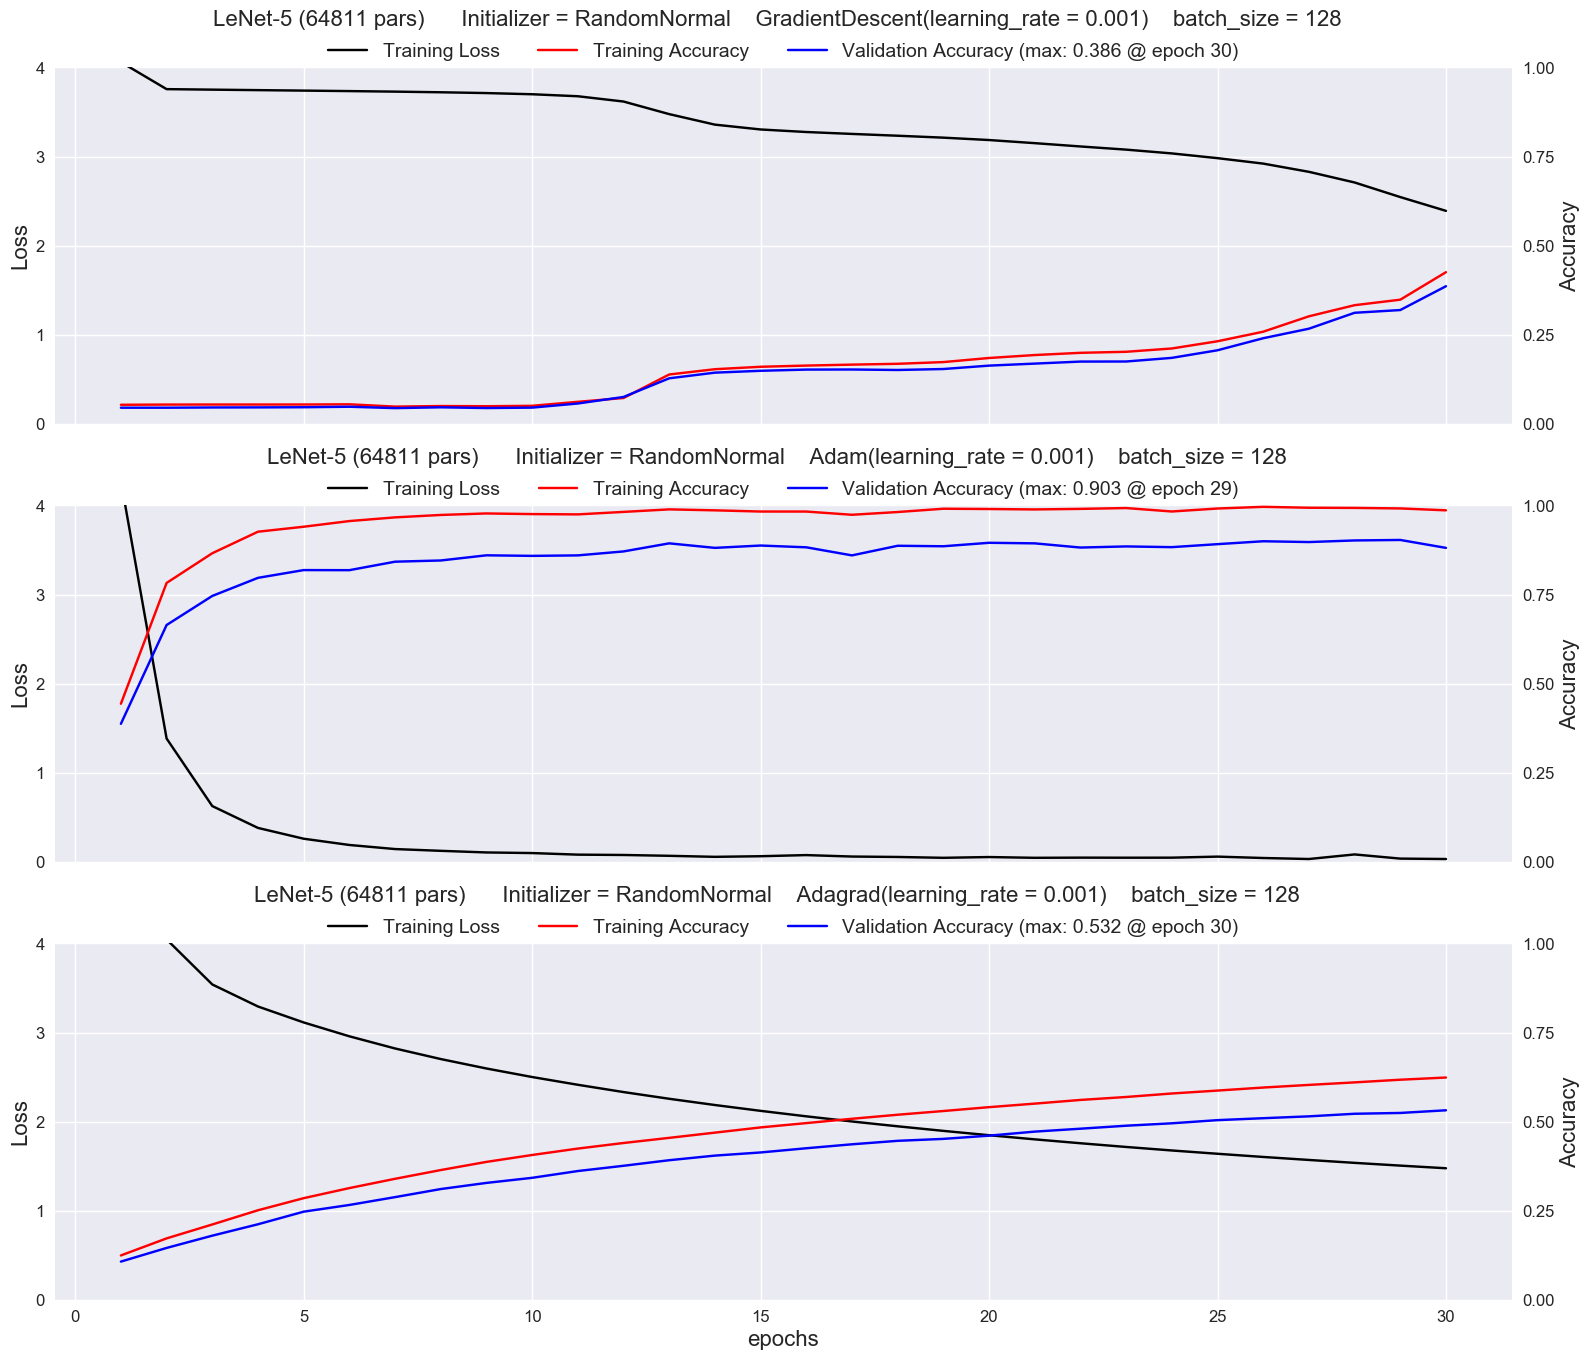

In [10]:
# Optimizer Pipeline
flag = True
if flag:

    # Parameters
    layers = lenet5_rgb
    initializer = 'RandomNormal'
    optimizers = ['GradientDescent', 'Adam', 'Adagrad']
    learning_rate = 0.001
    batch_size = 128
    epochs = 30

    collector = Collector()
    for optimizer in optimizers:
        print(f"\nOptimizer = {optimizer}")

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=False)
        loss, train_acc, valid_acc = lenet.train(
            train_data=train_data,
            valid_data=valid_data,
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc)

    plot_pipeline("LeNet-5_Optimizer", collector)


preprocess(x, scale=None, clahe=False)
Epoch 10/30:   Train Loss: 0.0853   Train Acc: 0.9827   Valid Acc: 0.8816
Epoch 20/30:   Train Loss: 0.0374   Train Acc: 0.9872   Valid Acc: 0.8710
Epoch 30/30:   Train Loss: 0.0232   Train Acc: 0.9929   Valid Acc: 0.8975

preprocess(x, scale=norm, clahe=False)
Epoch 10/30:   Train Loss: 0.0509   Train Acc: 0.9891   Valid Acc: 0.9143
Epoch 20/30:   Train Loss: 0.0194   Train Acc: 0.9973   Valid Acc: 0.9068
Epoch 30/30:   Train Loss: 0.0100   Train Acc: 0.9994   Valid Acc: 0.9206

preprocess(x, scale=std, clahe=False)
Epoch 10/30:   Train Loss: 0.0289   Train Acc: 0.9913   Valid Acc: 0.9190
Epoch 20/30:   Train Loss: 0.0036   Train Acc: 0.9997   Valid Acc: 0.9388
Epoch 30/30:   Train Loss: 0.0114   Train Acc: 0.9972   Valid Acc: 0.9454

preprocess(x, scale=None, clahe=True)
Epoch 10/30:   Train Loss: 0.0719   Train Acc: 0.9812   Valid Acc: 0.8762
Epoch 20/30:   Train Loss: 0.0280   Train Acc: 0.9869   Valid Acc: 0.8891
Epoch 30/30:   Train Loss: 0

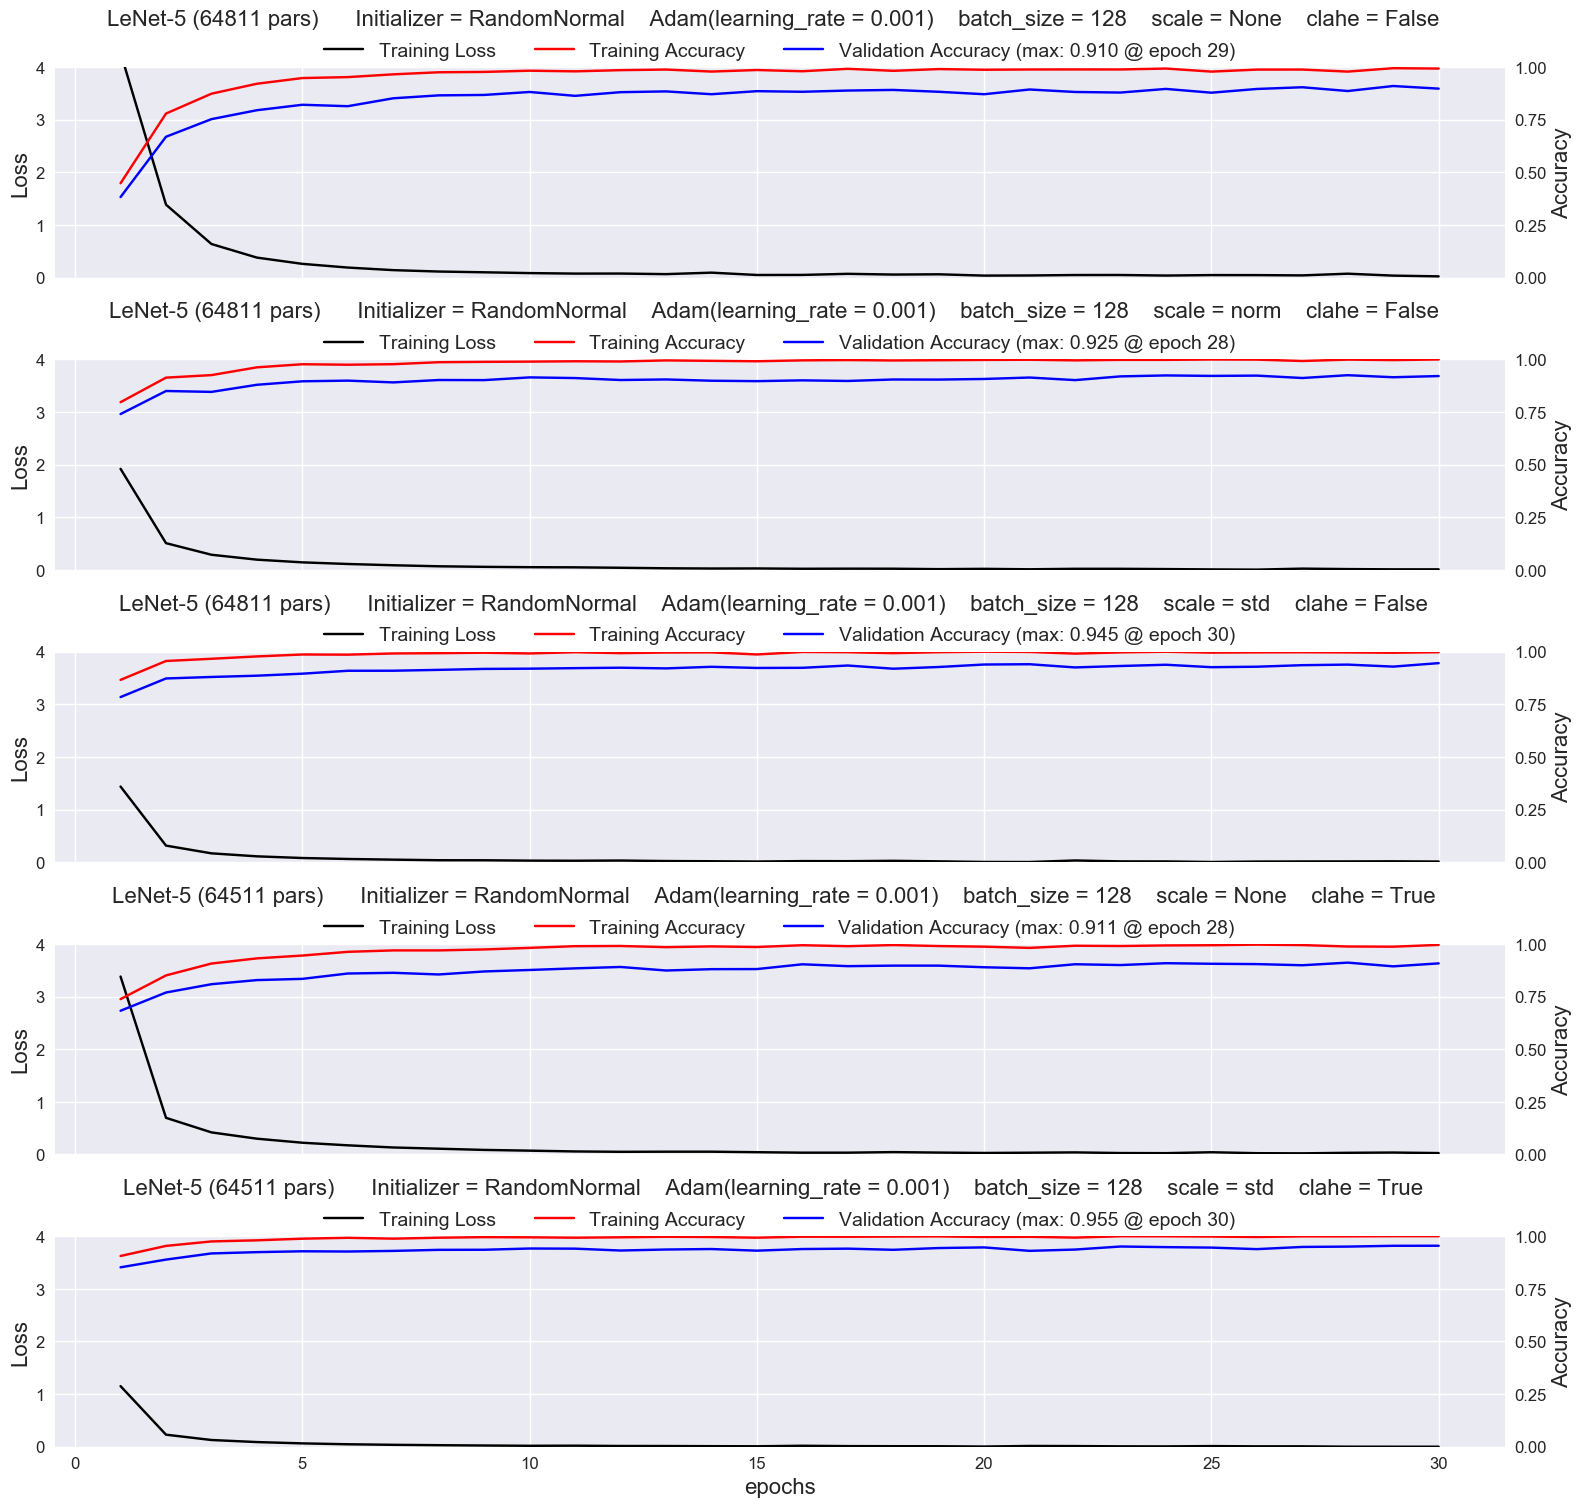

In [11]:
# Normalization pipeline
flag = True
if flag:

    # Parameters
    initializer = 'RandomNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    batch_size = 128
    epochs = 30

    normilization_kwargs = [
        OrderedDict(scale=None, clahe=False),
        OrderedDict(scale='norm', clahe=False),
        OrderedDict(scale='std', clahe=False),
        OrderedDict(scale=None, clahe=True),
        OrderedDict(scale='std', clahe=True)
    ]

    lenet_layers = [
        lenet5_rgb,
        lenet5_rgb,
        lenet5_rgb,
        lenet5_single_channel,
        lenet5_single_channel
    ]

    collector = Collector()
    for kwargs, layers in zip(normilization_kwargs, lenet_layers):
        print(f"\npreprocess(x, scale={kwargs['scale']}, "
              f"clahe={kwargs['clahe']})")
        
        x_train_pre = preprocess(x_train, **kwargs)
        x_valid_pre = preprocess(x_valid, **kwargs)

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=False)
        loss, train_acc, valid_acc = lenet.train(
            train_data=(x_train_pre, y_train),
            valid_data=(x_valid_pre, y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc, **kwargs)

    plot_pipeline("LeNet-5_Normalization", collector)


Initializer = RandomNormal
Epoch 10/30:   Train Loss: 0.0179   Train Acc: 0.9862   Valid Acc: 0.9179
Epoch 20/30:   Train Loss: 0.0081   Train Acc: 0.9992   Valid Acc: 0.9456
Epoch 30/30:   Train Loss: 0.0047   Train Acc: 0.9996   Valid Acc: 0.9508

Initializer = TruncatedNormal
Epoch 10/30:   Train Loss: 0.0149   Train Acc: 0.9976   Valid Acc: 0.9510
Epoch 20/30:   Train Loss: 0.0126   Train Acc: 0.9989   Valid Acc: 0.9626
Epoch 30/30:   Train Loss: 0.0018   Train Acc: 0.9996   Valid Acc: 0.9630

Initializer = HeNormal
Epoch 10/30:   Train Loss: 0.0142   Train Acc: 0.9981   Valid Acc: 0.9420
Epoch 20/30:   Train Loss: 0.0108   Train Acc: 0.9941   Valid Acc: 0.9274
Epoch 30/30:   Train Loss: 0.0000   Train Acc: 1.0000   Valid Acc: 0.9535

Initializer = XavierNormal
Epoch 10/30:   Train Loss: 0.0103   Train Acc: 0.9951   Valid Acc: 0.9497
Epoch 20/30:   Train Loss: 0.0135   Train Acc: 0.9924   Valid Acc: 0.9351
Epoch 30/30:   Train Loss: 0.0000   Train Acc: 1.0000   Valid Acc: 0.9658


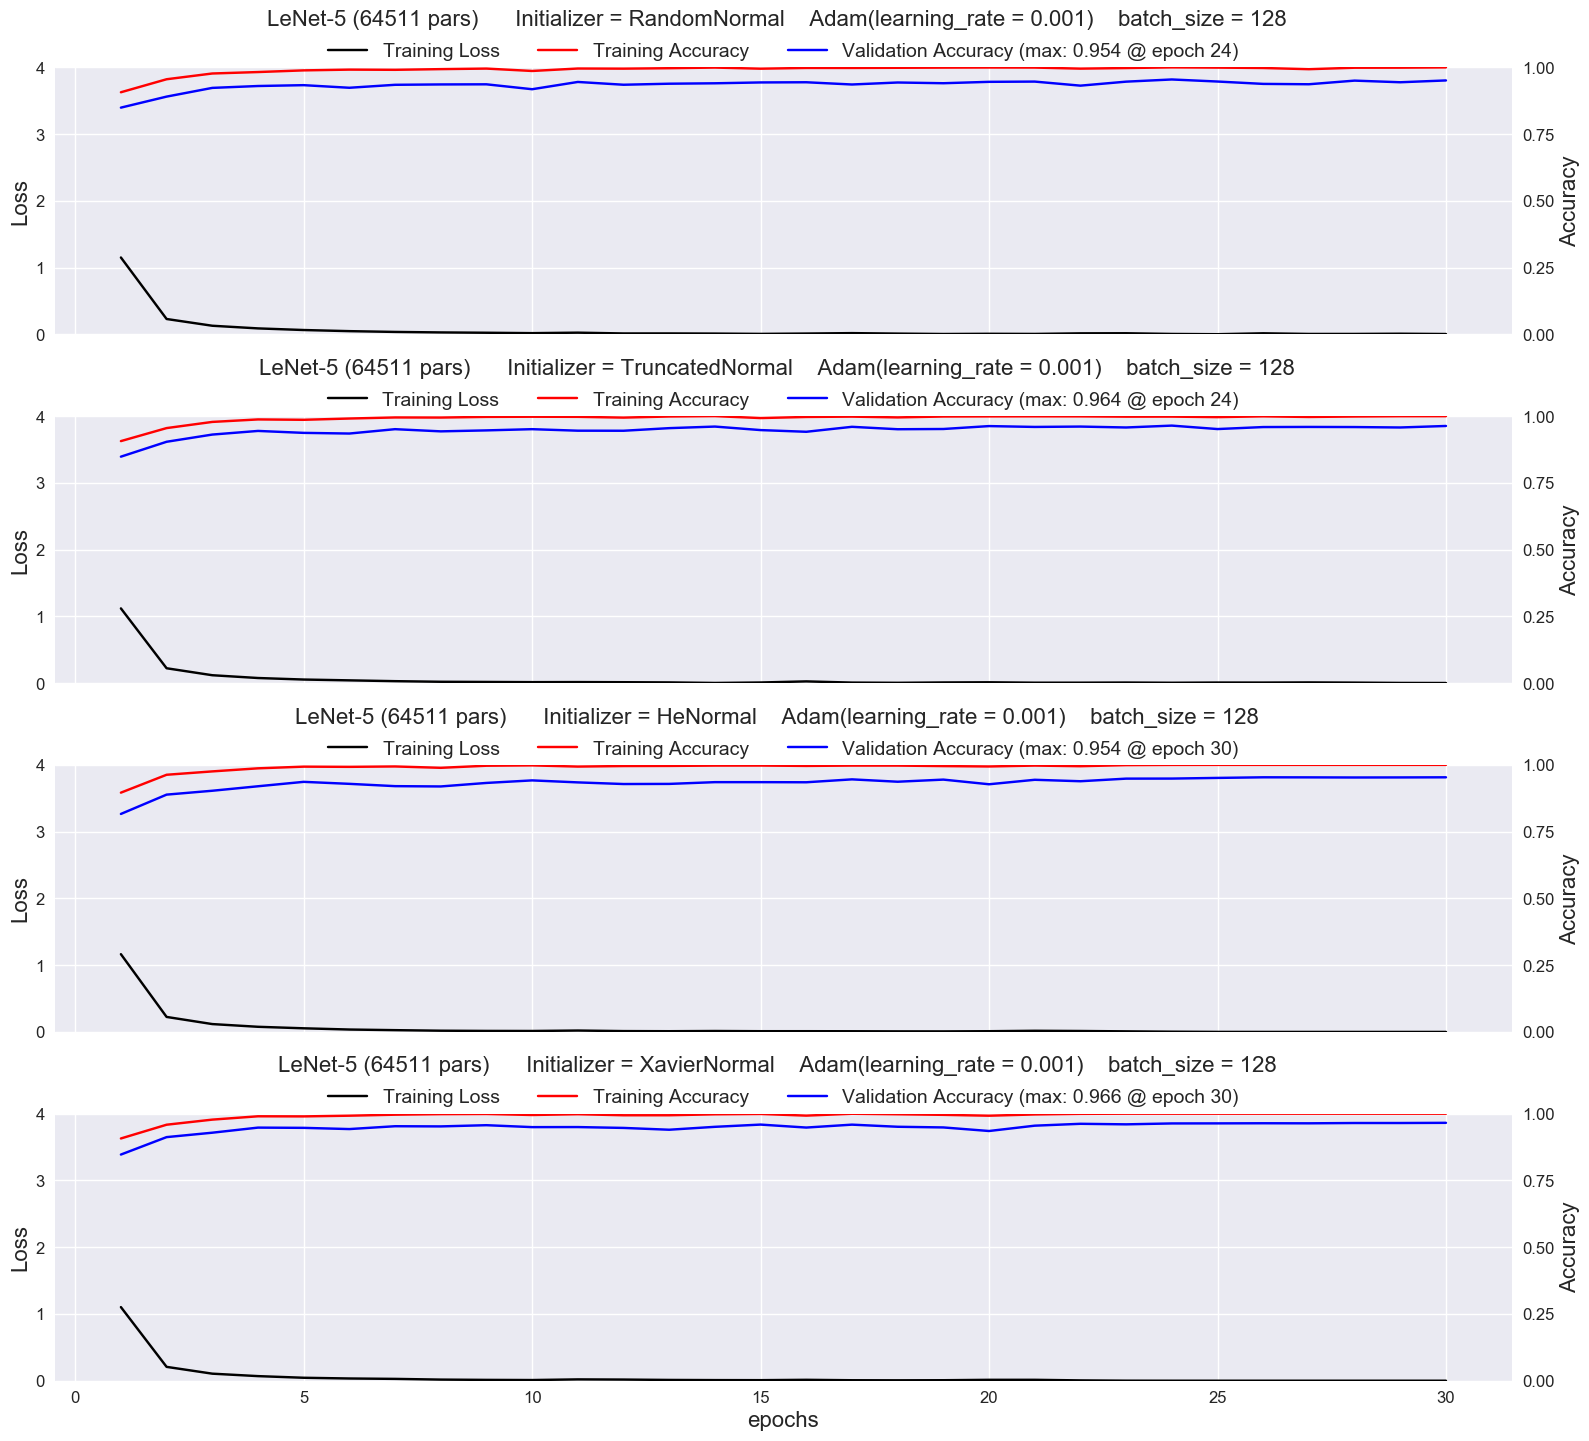

In [10]:
# Initializer pipeline
flag = True
if flag:

    # Parameters
    layers = lenet5_single_channel
    initializers = ["RandomNormal",
                    "TruncatedNormal",
                    "HeNormal",
                    "XavierNormal"]
    optimizer = 'Adam'
    learning_rate = 0.001
    batch_size = 128
    epochs = 30

    collector = Collector()
    for initializer in initializers:
        print(f"\nInitializer = {initializer}")

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=False)
        loss, train_acc, valid_acc = lenet.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc)

    plot_pipeline("LeNet-5_Initializer", collector)


Learning rate = 0.1
Epoch 10/30:   Train Loss: 3.4891   Train Acc: 0.0569   Valid Acc: 0.0544
Epoch 20/30:   Train Loss: 3.4905   Train Acc: 0.0552   Valid Acc: 0.0544
Epoch 30/30:   Train Loss: 3.4907   Train Acc: 0.0552   Valid Acc: 0.0544

Learning rate = 0.01
Epoch 10/30:   Train Loss: 0.1236   Train Acc: 0.9818   Valid Acc: 0.9397
Epoch 20/30:   Train Loss: 0.1735   Train Acc: 0.9766   Valid Acc: 0.9265
Epoch 30/30:   Train Loss: 0.1845   Train Acc: 0.9840   Valid Acc: 0.9415

Learning rate = 0.001
Epoch 10/30:   Train Loss: 0.0146   Train Acc: 0.9881   Valid Acc: 0.9290
Epoch 20/30:   Train Loss: 0.0103   Train Acc: 0.9976   Valid Acc: 0.9526
Epoch 30/30:   Train Loss: 0.0160   Train Acc: 0.9972   Valid Acc: 0.9574

Learning rate = 0.0001
Epoch 10/30:   Train Loss: 0.2365   Train Acc: 0.9398   Valid Acc: 0.8658
Epoch 20/30:   Train Loss: 0.1028   Train Acc: 0.9768   Valid Acc: 0.9045
Epoch 30/30:   Train Loss: 0.0555   Train Acc: 0.9876   Valid Acc: 0.9190


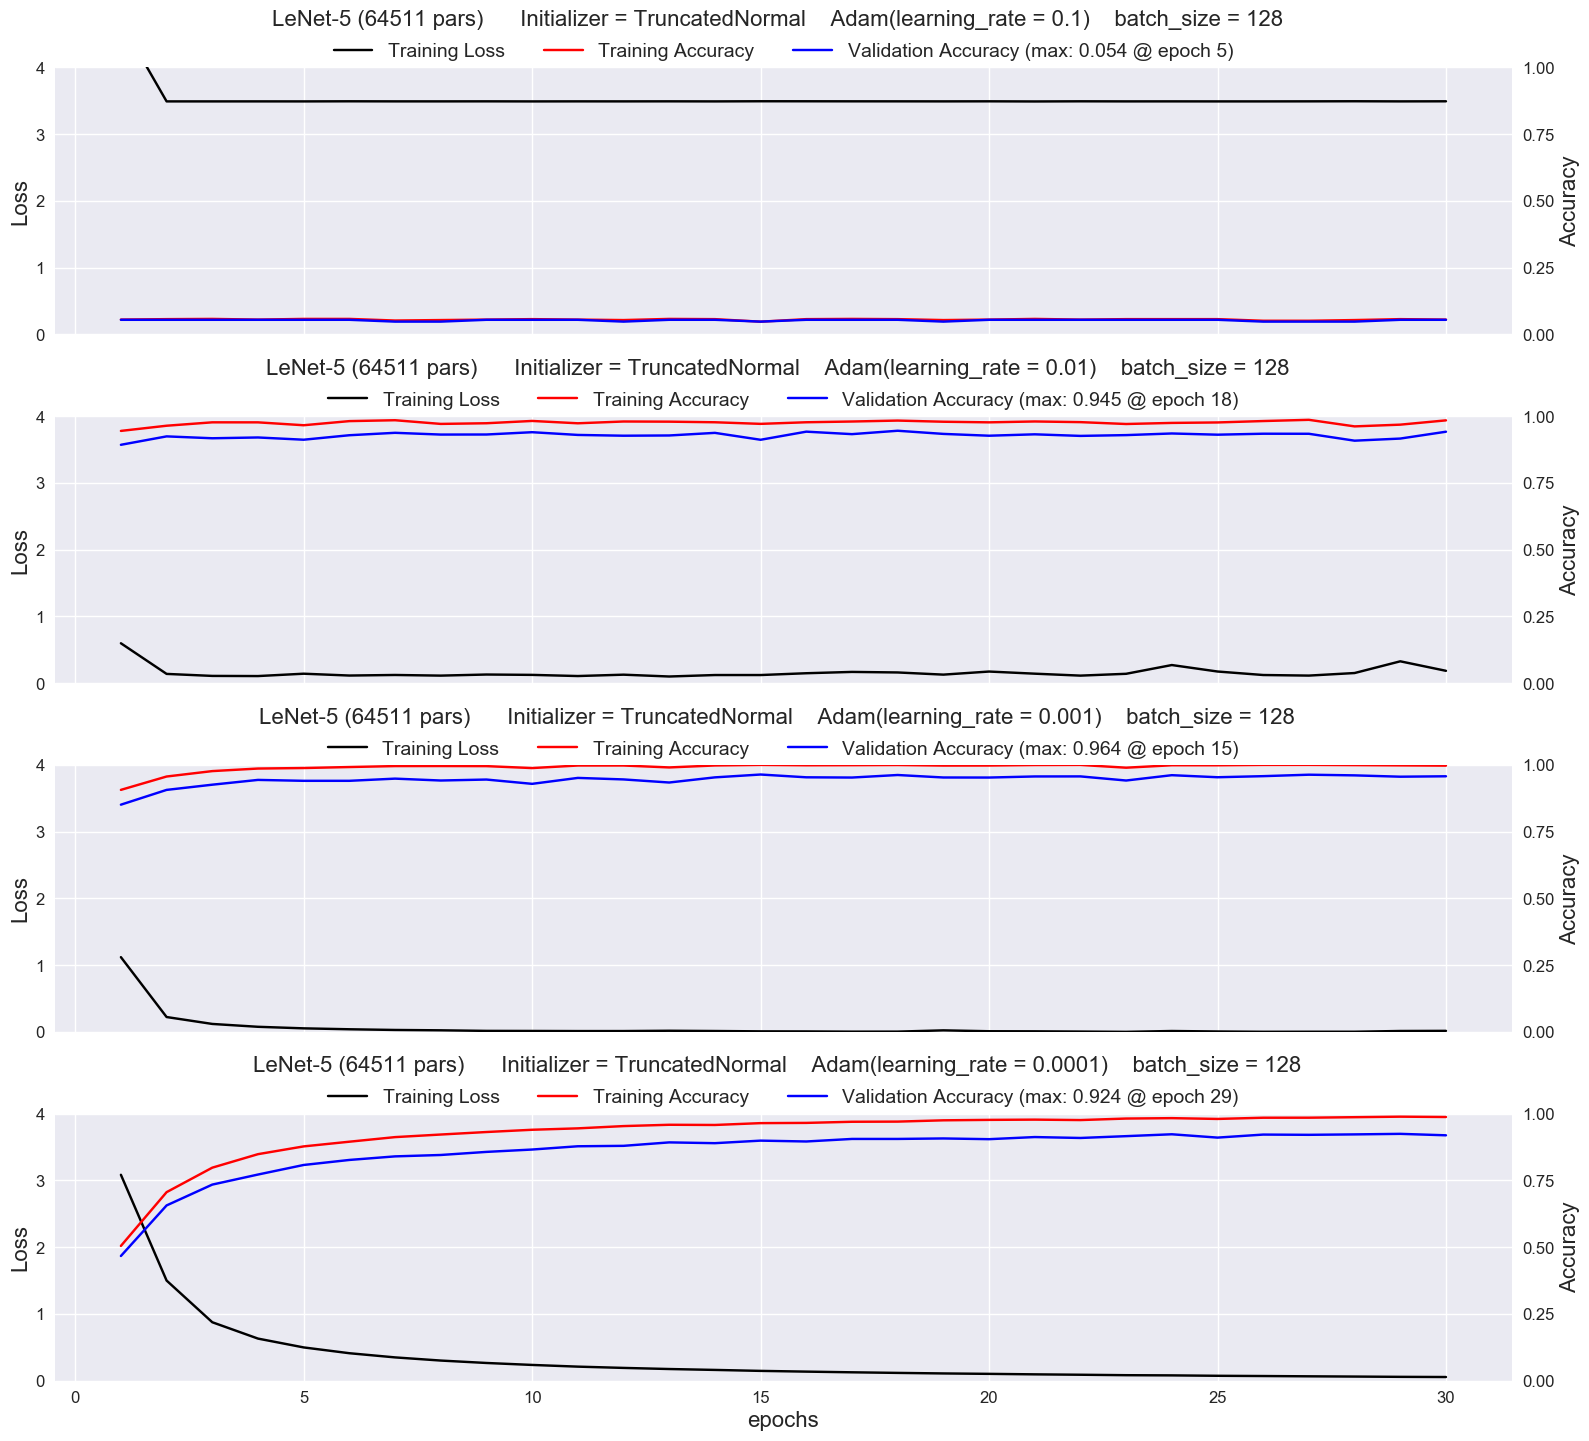

In [11]:
# Learning rates pipeline
flag = True
if flag:

    # Parameters
    layers = lenet5_single_channel
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rates = [0.1, 0.01, 0.001, 0.0001]
    batch_size = 128
    epochs = 30

    collector = Collector()
    for learning_rate in learning_rates:
        print(f"\nLearning rate = {learning_rate}")

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=False)
        loss, train_acc, valid_acc = lenet.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc)

    plot_pipeline("LeNet-5_Learning_Rates", collector)


Batch size = 32
Epoch 10/30:   Train Loss: 0.0174   Train Acc: 0.9965   Valid Acc: 0.9562
Epoch 20/30:   Train Loss: 0.0132   Train Acc: 0.9974   Valid Acc: 0.9542
Epoch 30/30:   Train Loss: 0.0060   Train Acc: 0.9974   Valid Acc: 0.9562

Batch size = 64
Epoch 10/30:   Train Loss: 0.0147   Train Acc: 0.9889   Valid Acc: 0.9454
Epoch 20/30:   Train Loss: 0.0156   Train Acc: 0.9969   Valid Acc: 0.9490
Epoch 30/30:   Train Loss: 0.0049   Train Acc: 0.9994   Valid Acc: 0.9560

Batch size = 128
Epoch 10/30:   Train Loss: 0.0135   Train Acc: 0.9949   Valid Acc: 0.9494
Epoch 20/30:   Train Loss: 0.0108   Train Acc: 0.9917   Valid Acc: 0.9383
Epoch 30/30:   Train Loss: 0.0059   Train Acc: 0.9995   Valid Acc: 0.9626

Batch size = 256
Epoch 10/30:   Train Loss: 0.0248   Train Acc: 0.9940   Valid Acc: 0.9308
Epoch 20/30:   Train Loss: 0.0008   Train Acc: 1.0000   Valid Acc: 0.9474
Epoch 30/30:   Train Loss: 0.0002   Train Acc: 1.0000   Valid Acc: 0.9454


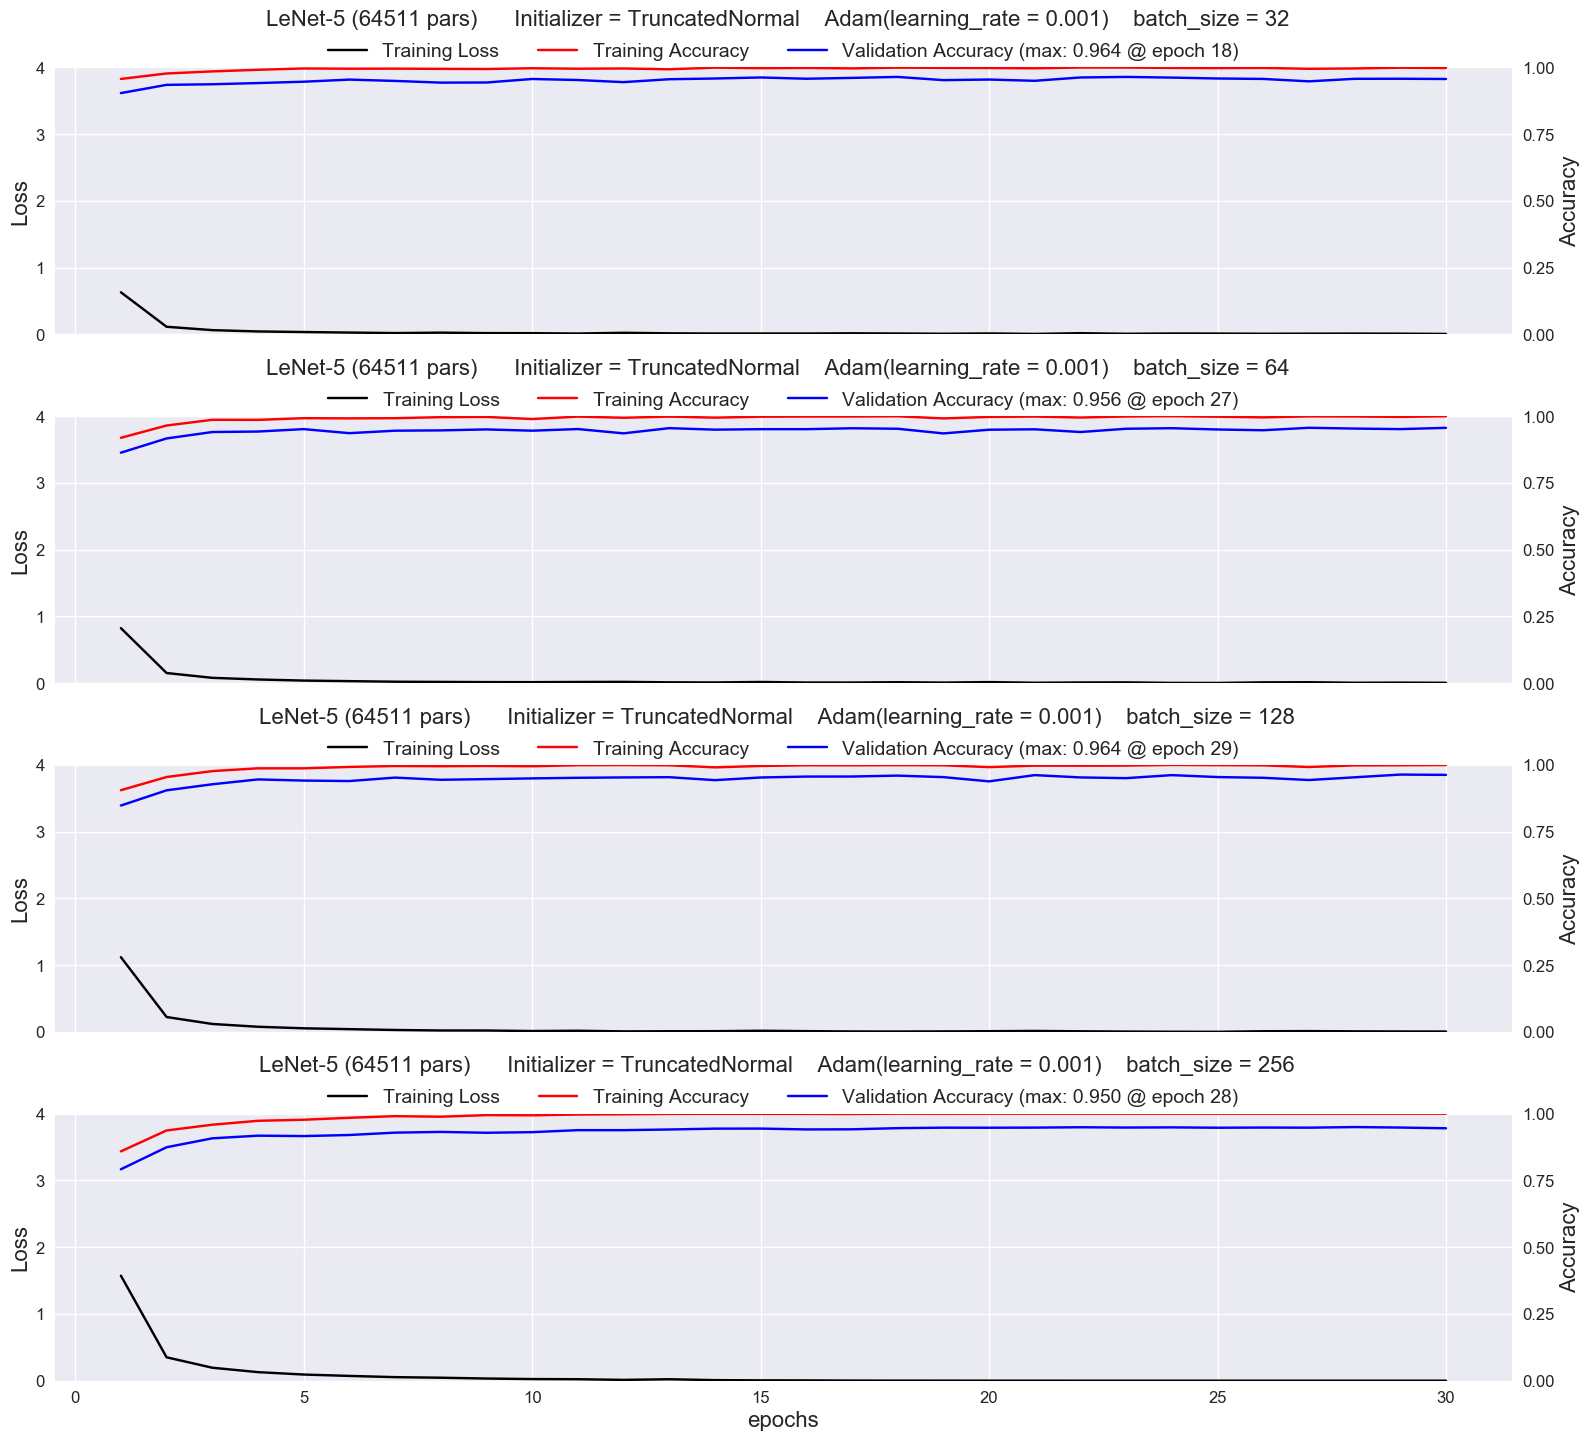

In [12]:
# Batch size pipeline
flag = True
if flag:

    # Parameters
    layers = lenet5_single_channel
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    batch_sizes = [32, 64, 128, 256]
    epochs = 30

    collector = Collector()
    for batch_size in batch_sizes:
        print(f"\nBatch size = {batch_size}")

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=False)
        loss, train_acc, valid_acc = lenet.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size,  
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc)

    plot_pipeline("LeNet-5_Batch_Sizes", collector)


keep_prob = 1.0
Epoch 10/30:   Train Loss: 0.0134   Train Acc: 0.9970   Valid Acc: 0.9515
Epoch 20/30:   Train Loss: 0.0082   Train Acc: 0.9979   Valid Acc: 0.9463
Epoch 30/30:   Train Loss: 0.0001   Train Acc: 1.0000   Valid Acc: 0.9676

keep_prob = 0.75
Epoch 10/30:   Train Loss: 0.0688   Train Acc: 0.9958   Valid Acc: 0.9580
Epoch 20/30:   Train Loss: 0.0324   Train Acc: 0.9993   Valid Acc: 0.9723
Epoch 30/30:   Train Loss: 0.0219   Train Acc: 0.9999   Valid Acc: 0.9705

keep_prob = 0.5
Epoch 10/30:   Train Loss: 0.2520   Train Acc: 0.9863   Valid Acc: 0.9590
Epoch 20/30:   Train Loss: 0.1453   Train Acc: 0.9943   Valid Acc: 0.9669
Epoch 30/30:   Train Loss: 0.1063   Train Acc: 0.9983   Valid Acc: 0.9732

keep_prob = 0.25
Epoch 10/30:   Train Loss: 1.2227   Train Acc: 0.8211   Valid Acc: 0.7821
Epoch 20/30:   Train Loss: 1.0344   Train Acc: 0.8741   Valid Acc: 0.8454
Epoch 30/30:   Train Loss: 0.9459   Train Acc: 0.8859   Valid Acc: 0.8587


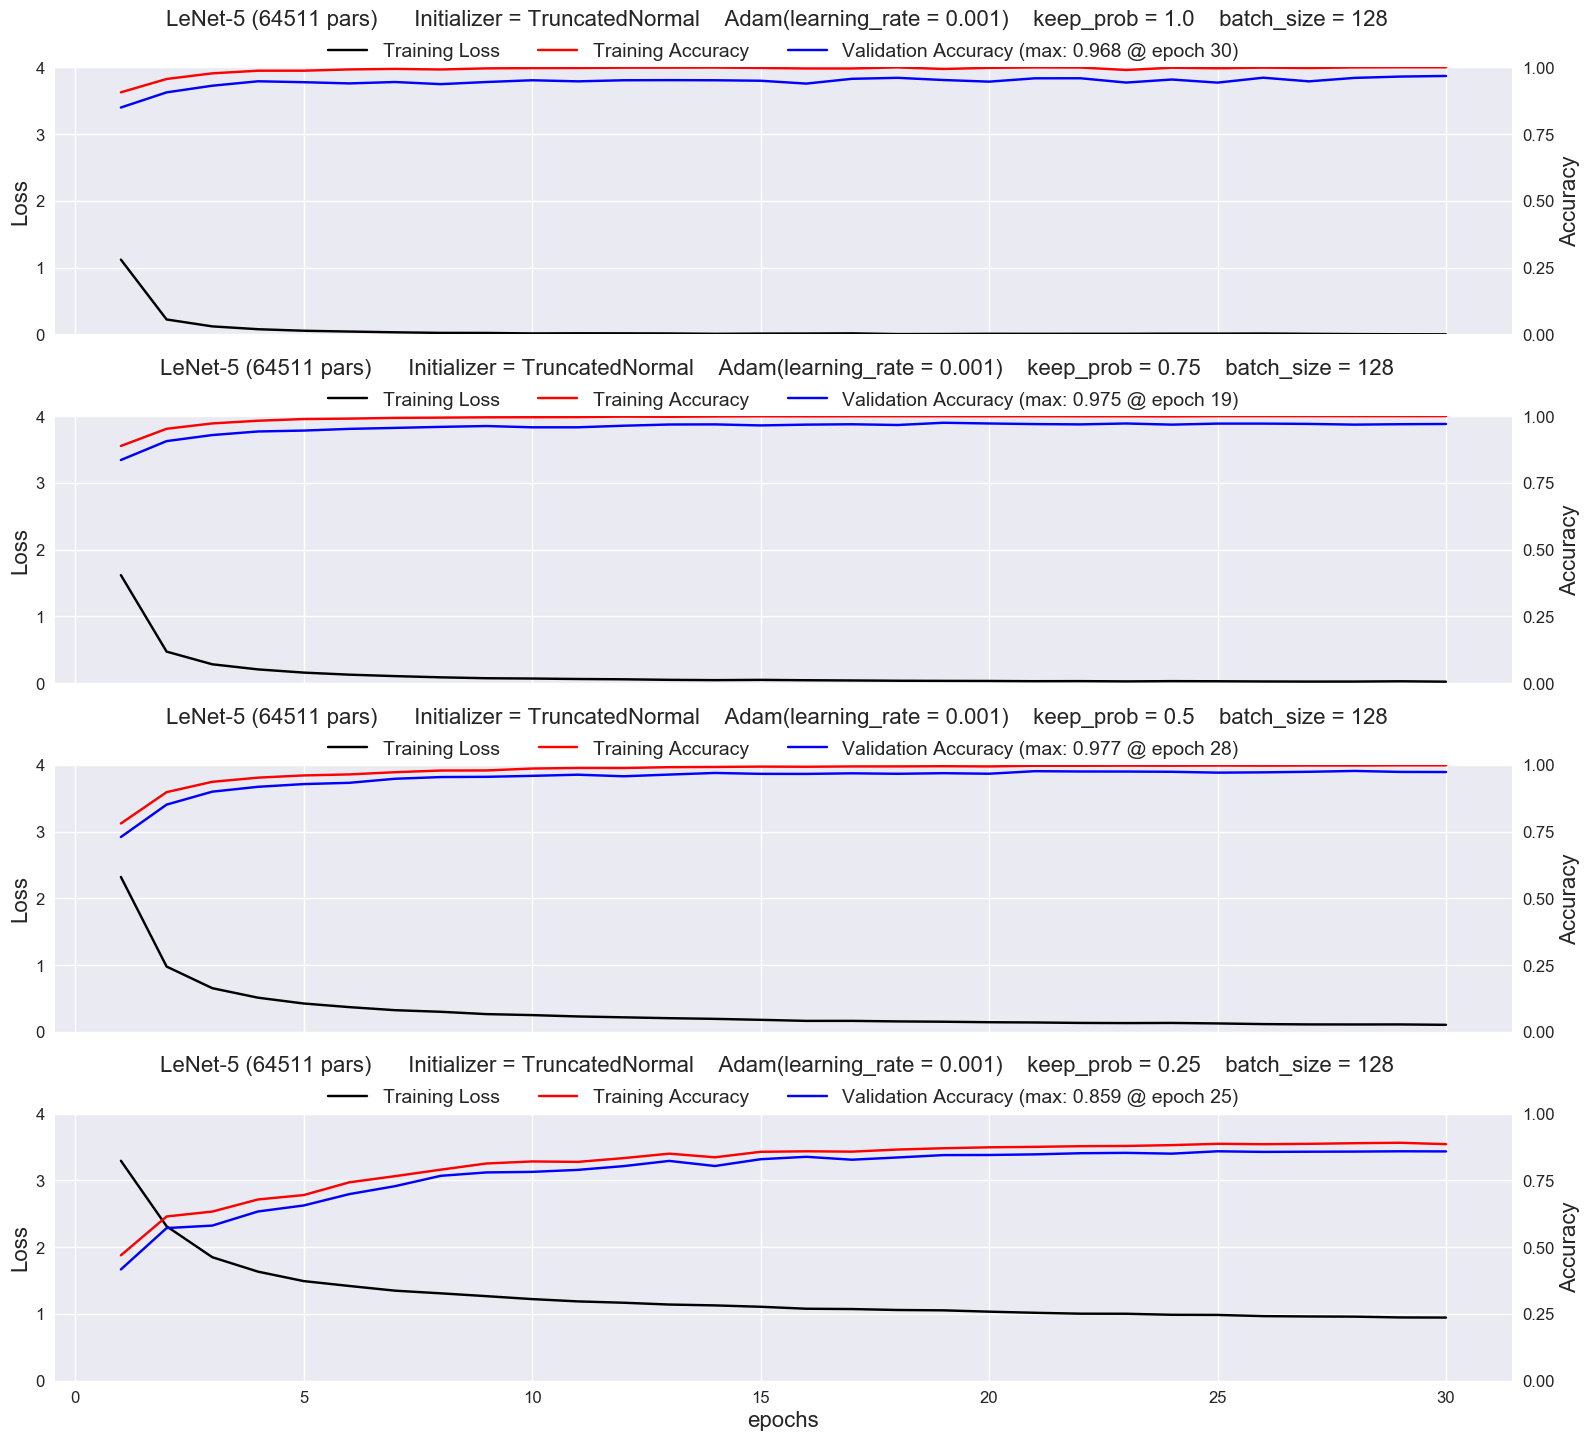

In [13]:
# Dropout pipeline
flag = True
if flag:

    # Parameters
    layers = lenet5_single_channel
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    keep_probs = [1.0, 0.75, 0.5, 0.25]
    batch_size = 128
    epochs = 30

    collector = Collector()
    for keep_prob in keep_probs:
        print(f"\nkeep_prob = {keep_prob}")

        tf.reset_default_graph()
        lenet = Model('LeNet-5')
        lenet.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=True)
        loss, train_acc, valid_acc = lenet.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            epochs=epochs,
            batch_size=batch_size,
            keep_prob=keep_prob, 
            verbose=1)

        collector.collect(lenet, loss, train_acc, valid_acc)

    plot_pipeline("LeNet_Dropout", collector)


depth multiplicator = 1
Epoch 10/30:   Train Loss: 0.2535   Train Acc: 0.9851   Valid Acc: 0.9601
Epoch 20/30:   Train Loss: 0.1420   Train Acc: 0.9959   Valid Acc: 0.9737
Epoch 30/30:   Train Loss: 0.1078   Train Acc: 0.9980   Valid Acc: 0.9751

depth multiplicator = 3
Epoch 10/30:   Train Loss: 0.0465   Train Acc: 0.9997   Valid Acc: 0.9766
Epoch 20/30:   Train Loss: 0.0231   Train Acc: 0.9996   Valid Acc: 0.9798
Epoch 30/30:   Train Loss: 0.0160   Train Acc: 0.9997   Valid Acc: 0.9789

depth multiplicator = 6
Epoch 10/30:   Train Loss: 0.0264   Train Acc: 0.9997   Valid Acc: 0.9807
Epoch 20/30:   Train Loss: 0.0136   Train Acc: 1.0000   Valid Acc: 0.9764
Epoch 30/30:   Train Loss: 0.0151   Train Acc: 1.0000   Valid Acc: 0.9794

depth multiplicator = 9
Epoch 10/30:   Train Loss: 0.0217   Train Acc: 0.9998   Valid Acc: 0.9800
Epoch 20/30:   Train Loss: 0.0165   Train Acc: 0.9994   Valid Acc: 0.9796
Epoch 30/30:   Train Loss: 0.0104   Train Acc: 1.0000   Valid Acc: 0.9796


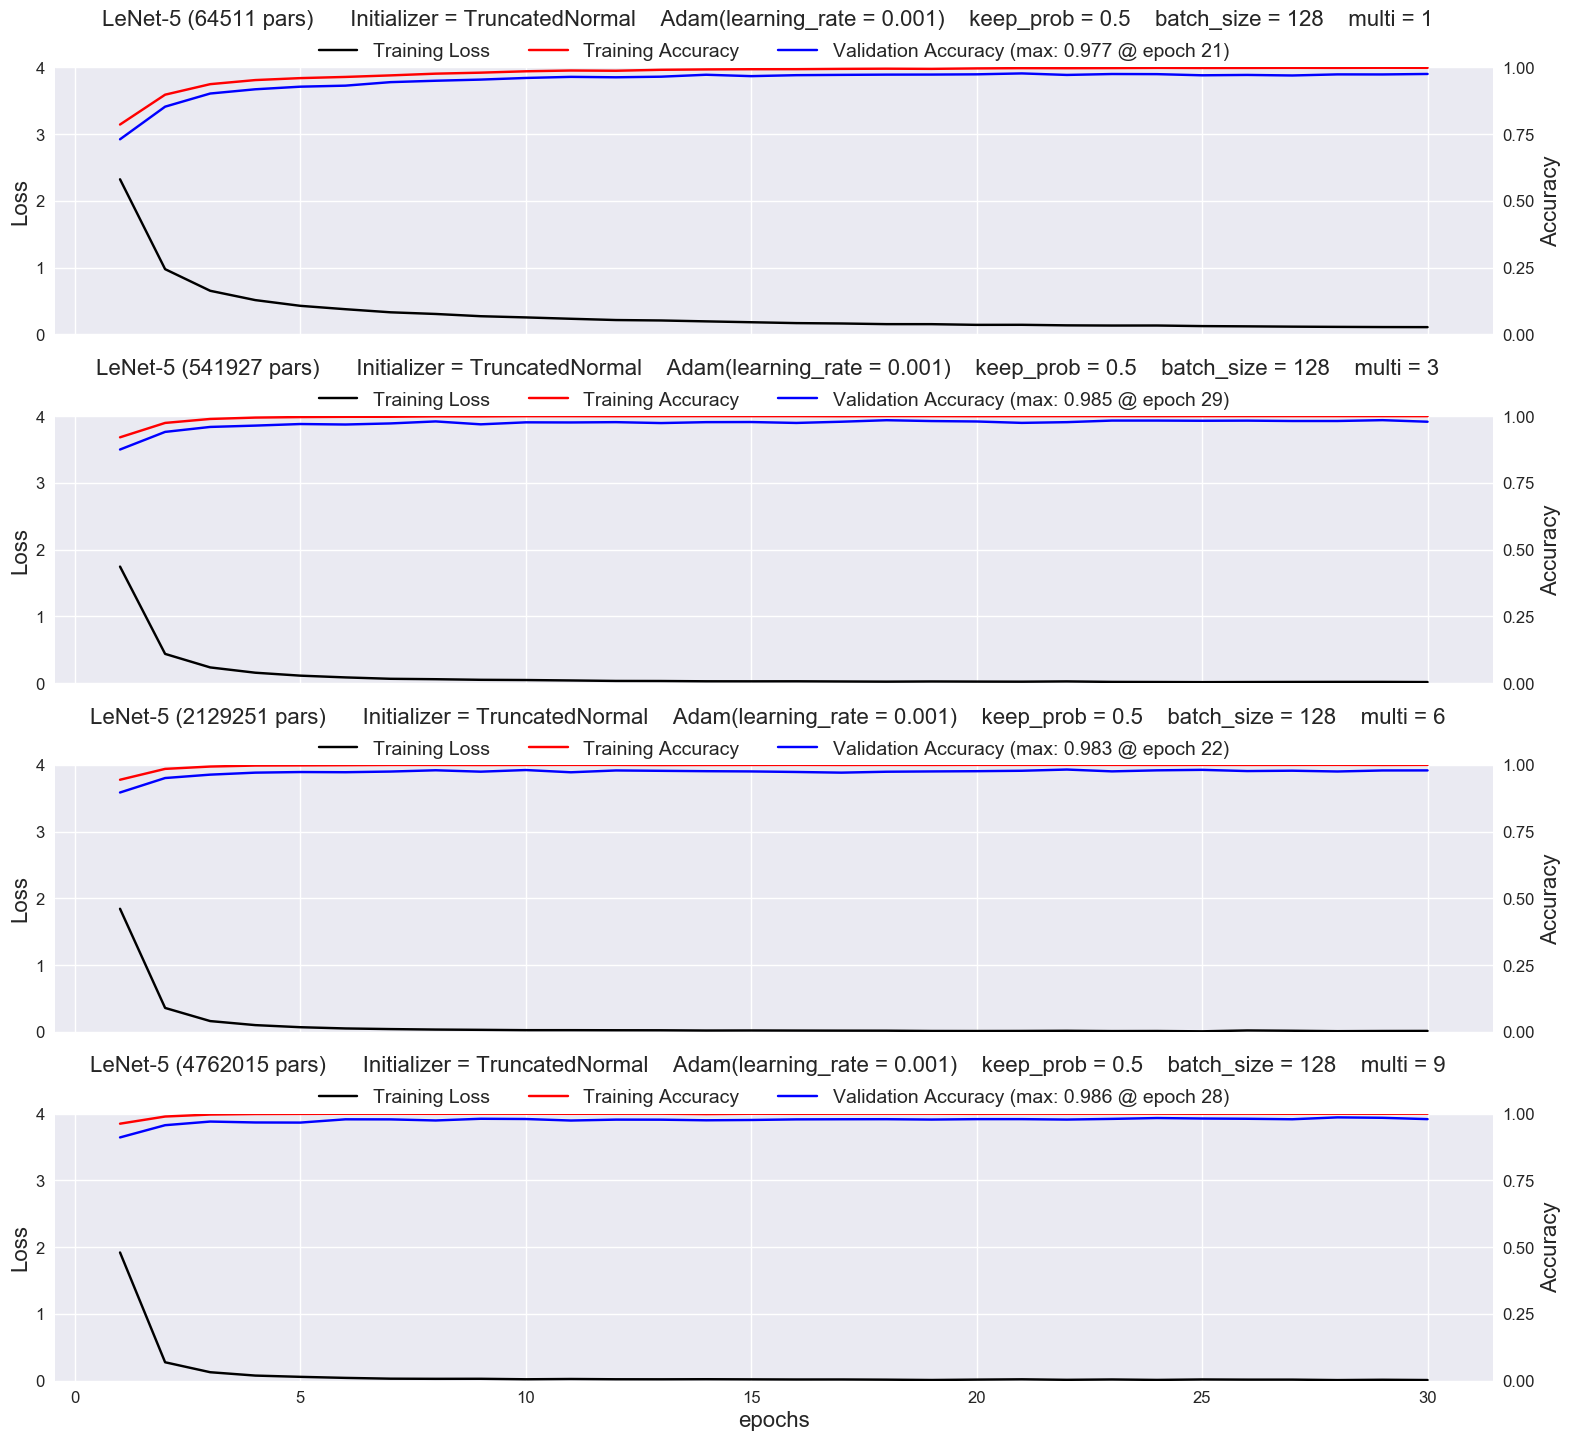

In [14]:
# Convolution depth pipeline
flag = True
if flag:

    # Parameters
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    keep_prob = 0.5
    batch_size = 128
    epochs = 30
    multiplicators = [1, 3, 6, 9]

    collector = Collector()
    for multi in multiplicators:
        lenet5_single_channel_extended_conv_depth = [
            # in: 32 x 32 x 1
            Conv2d(name="conv1",
                   shape=(5, 5, 1, 6 * multi),
                   strides=[1, 1, 1, 1],
                   padding="VALID",
                   activation="Relu"),
            # 28 x 28 x (6 | 18 | 36 | 54)
            Pool(name="pool1",
                 shape=(1, 2, 2, 1),
                 strides=(1, 2, 2, 1),
                 padding="VALID",
                 pooling_type="MAX"),
            # 14 x 14 x (6 | 18 | 36 | 54)
            Conv2d(name="conv2",
                   shape=(5, 5, 6, 16 * multi),
                   strides=[1, 1, 1, 1],
                   padding="VALID",
                   activation="Relu"),
            # 10 x 10 x (16 | 48 | 96 | 144)
            Pool(name="pool2",
                 shape=(1, 2, 2, 1),
                 strides=(1, 2, 2, 1),
                 padding="VALID",
                 pooling_type="MAX"),
            # 5 x 5 x (16 | 48 | 96 | 144) = 400 | 1200 | 2400 | 3600
            Flatten(size=400 * multi),
            # 400 | 1200 | 2400 | 3600
            Dense(name="fc3",
                  shape=(400 * multi, 120 * multi),
                  activation="Relu",
                  dropout=True),
            # shape: (120 | 360 | 720 | 1080) (with dropout)
            Dense(name="fc4",
                  shape=(120 * multi, 84 * multi),
                  activation="Relu",
                  dropout=True),
            # shape: (84 | 252 | 504 | 756)
            Dense(name="fc5",
                  shape=(84 * multi, 43),
                  activation=None)]  # out: 43

        print(f"\ndepth multiplicator = {multi}")

        tf.reset_default_graph()
        lenet_extdepth = Model(f'LeNet-5')
        lenet_extdepth.compile(
            layers=lenet5_single_channel_extended_conv_depth,
            initializer=initializer,
            activate_dropout=True)
        loss, train_acc, valid_acc = lenet_extdepth.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            keep_prob=keep_prob,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(lenet_extdepth, loss, train_acc, valid_acc,
                          multi=multi)

    plot_pipeline("LeNet-5_Extendended_Conv_Depth", collector)


LeNet-5
Epoch 10/30:   Train Loss: 0.2538   Train Acc: 0.9859   Valid Acc: 0.9626
Epoch 20/30:   Train Loss: 0.1423   Train Acc: 0.9955   Valid Acc: 0.9680
Epoch 30/30:   Train Loss: 0.1102   Train Acc: 0.9980   Valid Acc: 0.9769

LeNet-6a
Epoch 10/30:   Train Loss: 0.1090   Train Acc: 0.9952   Valid Acc: 0.9560
Epoch 20/30:   Train Loss: 0.0491   Train Acc: 0.9990   Valid Acc: 0.9562
Epoch 30/30:   Train Loss: 0.0256   Train Acc: 0.9995   Valid Acc: 0.9549

LeNet-6b
Epoch 10/30:   Train Loss: 0.2093   Train Acc: 0.9864   Valid Acc: 0.9546
Epoch 20/30:   Train Loss: 0.1119   Train Acc: 0.9967   Valid Acc: 0.9617
Epoch 30/30:   Train Loss: 0.0824   Train Acc: 0.9984   Valid Acc: 0.9662


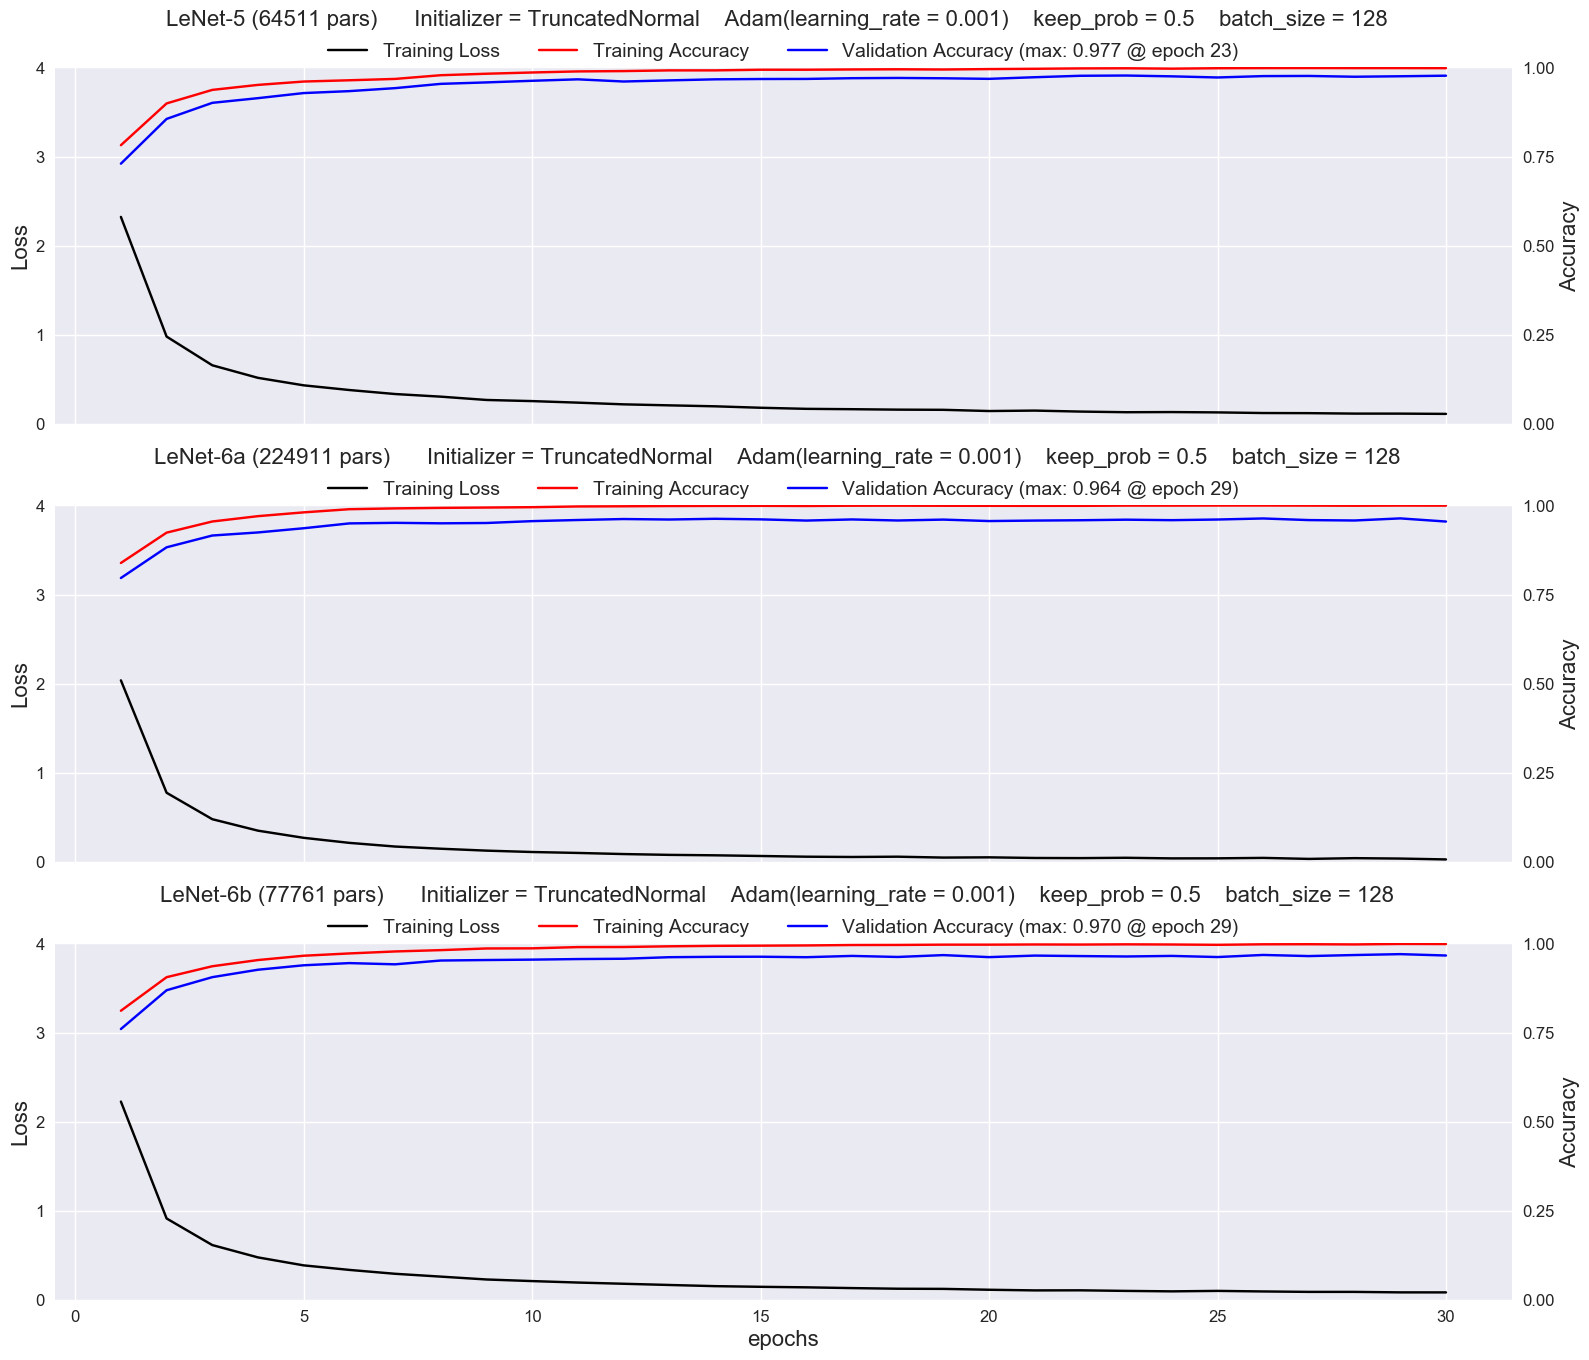

In [15]:
# Additional convolution layers
flag = True
if flag:

    # Parameters
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    keep_prob = 0.5
    batch_size = 128
    epochs = 30

    names = ["LeNet-5", "LeNet-6a", "LeNet-6b"]
    layers_list = [lenet5_single_channel, lenet6a_layers, lenet6b_layers]

    collector = Collector()
    for name, layers in zip(names, layers_list):
        print(f"\n{name}")

        tf.reset_default_graph()
        model = Model(f'{name}')
        model.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=True)
        loss, train_acc, valid_acc = model.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            keep_prob=keep_prob,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(model, loss, train_acc, valid_acc)

    plot_pipeline("LeNet_Additional_Layers", collector)


LeNet-5
Epoch 10/30:   Train Loss: 0.2559   Train Acc: 0.9850   Valid Acc: 0.9610
Epoch 20/30:   Train Loss: 0.1449   Train Acc: 0.9961   Valid Acc: 0.9723
Epoch 30/30:   Train Loss: 0.1100   Train Acc: 0.9983   Valid Acc: 0.9730

LeNet-6a_concat_c2c3
Epoch 10/30:   Train Loss: 0.1545   Train Acc: 0.9952   Valid Acc: 0.9560
Epoch 20/30:   Train Loss: 0.0643   Train Acc: 0.9993   Valid Acc: 0.9669
Epoch 30/30:   Train Loss: 0.0479   Train Acc: 0.9997   Valid Acc: 0.9642

LeNet-6a_concat_p2c3
Epoch 10/30:   Train Loss: 0.1399   Train Acc: 0.9954   Valid Acc: 0.9590
Epoch 20/30:   Train Loss: 0.0692   Train Acc: 0.9995   Valid Acc: 0.9649
Epoch 30/30:   Train Loss: 0.0464   Train Acc: 0.9995   Valid Acc: 0.9746

LeNet-6b_concat_c2c3
Epoch 10/30:   Train Loss: 0.1805   Train Acc: 0.9950   Valid Acc: 0.9560
Epoch 20/30:   Train Loss: 0.0972   Train Acc: 0.9991   Valid Acc: 0.9698
Epoch 30/30:   Train Loss: 0.0725   Train Acc: 0.9996   Valid Acc: 0.9717

LeNet-6b_concat_p2c3
Epoch 10/30:   

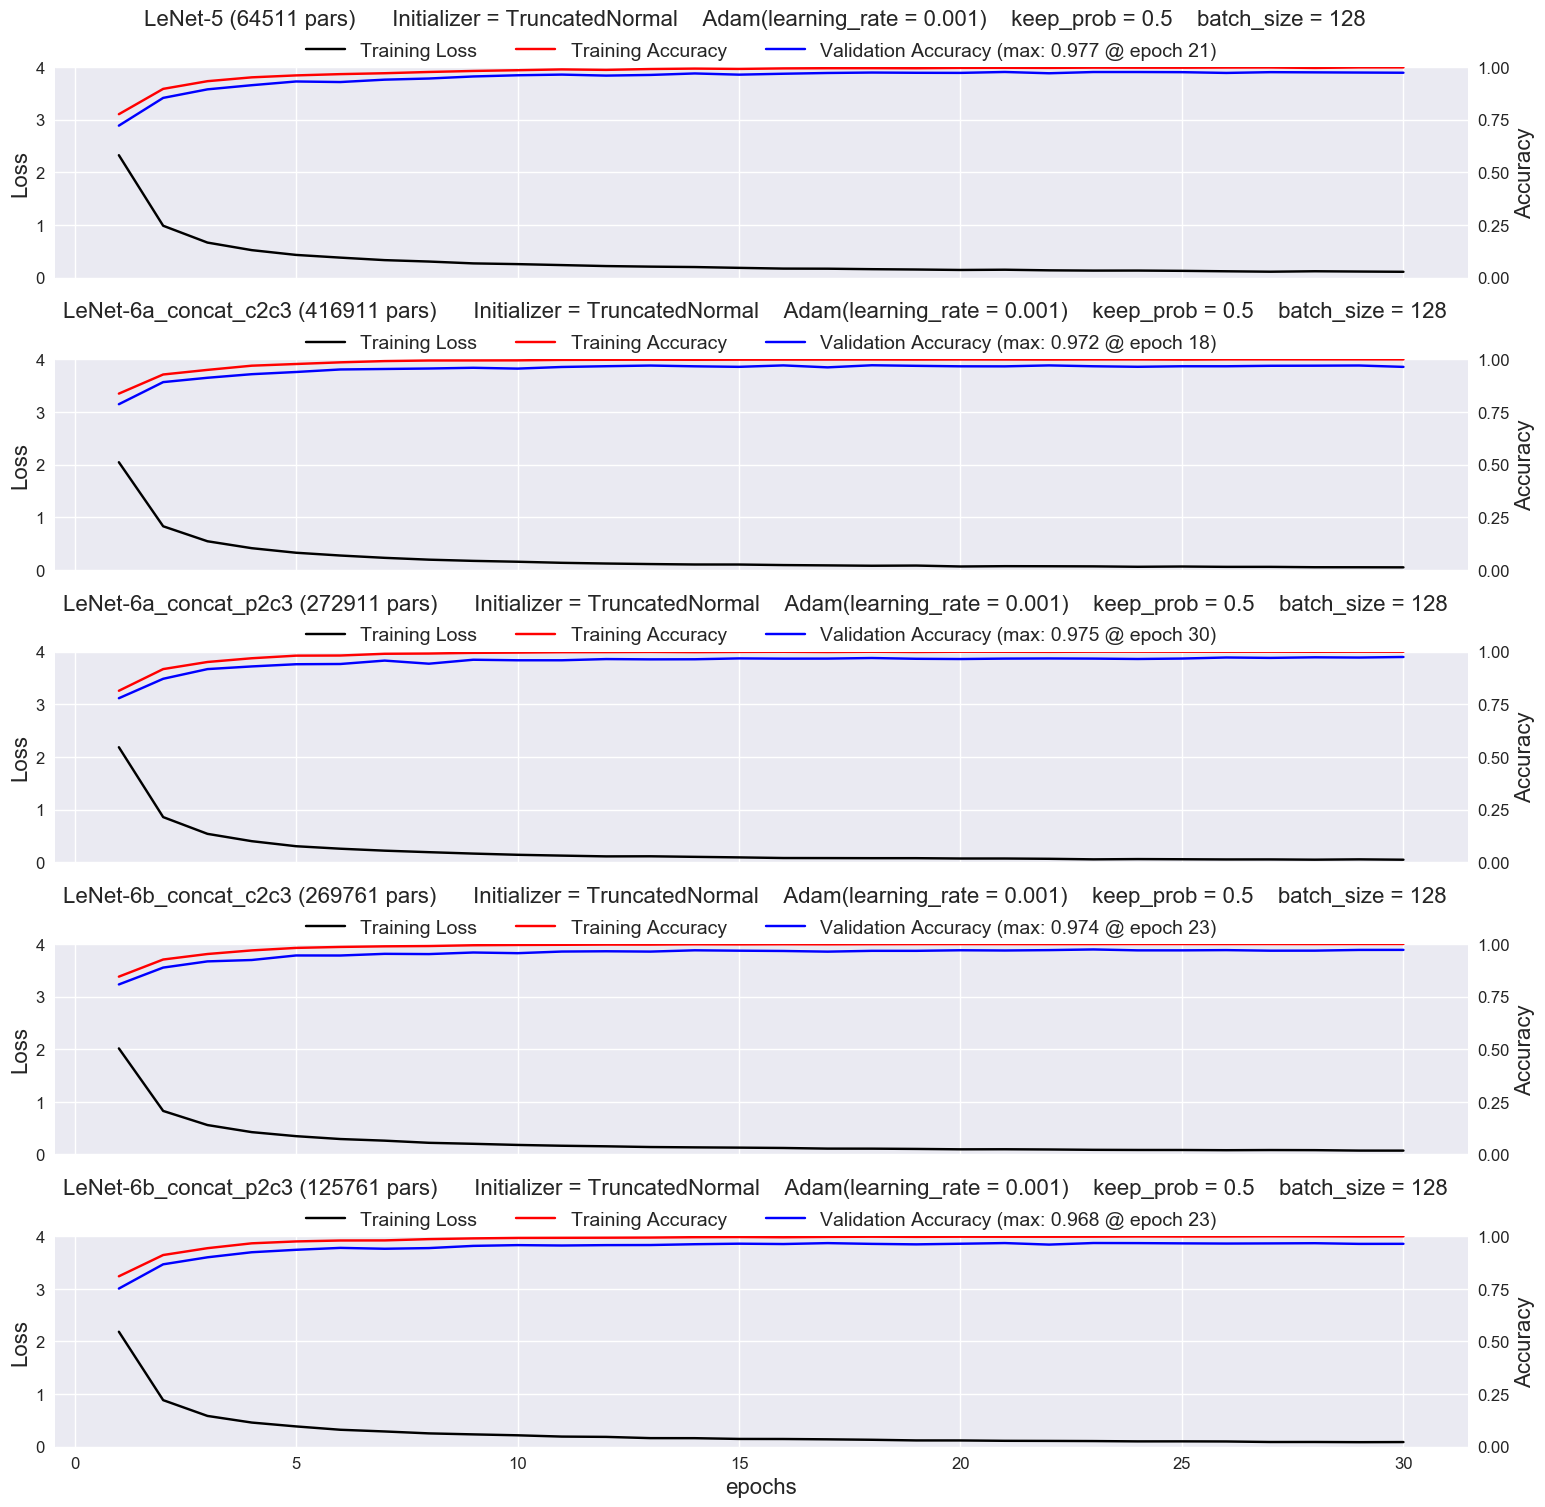

In [16]:
# Concatenating layers
flag = True
if flag:

    # Parameters
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    keep_prob = 0.5
    batch_size = 128
    epochs = 30

    names = ["LeNet-5",
             "LeNet-6a_concat_c2c3",
             "LeNet-6a_concat_p2c3",
             "LeNet-6b_concat_c2c3",
             "LeNet-6b_concat_p2c3"]
    layers_list = [lenet5_single_channel,
                   lenet6a_layers_concat_c2c3,
                   lenet6a_layers_concat_p2c3,
                   lenet6b_layers_concat_c2c3,
                   lenet6b_layers_concat_p2c3]

    collector = Collector()
    for name, layers in zip(names, layers_list):
        print(f"\n{name}")

        tf.reset_default_graph()
        model = Model(f'{name}')
        model.compile(layers=layers,
                      initializer=initializer,
                      activate_dropout=True)
        loss, train_acc, valid_acc = model.train(
            train_data=(preprocess(x_train), y_train),
            valid_data=(preprocess(x_valid), y_valid),
            optimizer=optimizer,
            learning_rate=learning_rate,
            keep_prob=keep_prob,
            epochs=epochs,
            batch_size=batch_size, 
            verbose=1)

        collector.collect(model, loss, train_acc, valid_acc)

    plot_pipeline("LeNet_Concat", collector)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Epoch 10/50:   Train Loss: 0.2570   Train Acc: 0.9857   Valid Acc: 0.9585
Epoch 20/50:   Train Loss: 0.1486   Train Acc: 0.9955   Valid Acc: 0.9687
Epoch 30/50:   Train Loss: 0.1100   Train Acc: 0.9979   Valid Acc: 0.9746
Epoch 40/50:   Train Loss: 0.0859   Train Acc: 0.9988   Valid Acc: 0.9771
Epoch 50/50:   Train Loss: 0.0798   Train Acc: 0.9997   Valid Acc: 0.9762


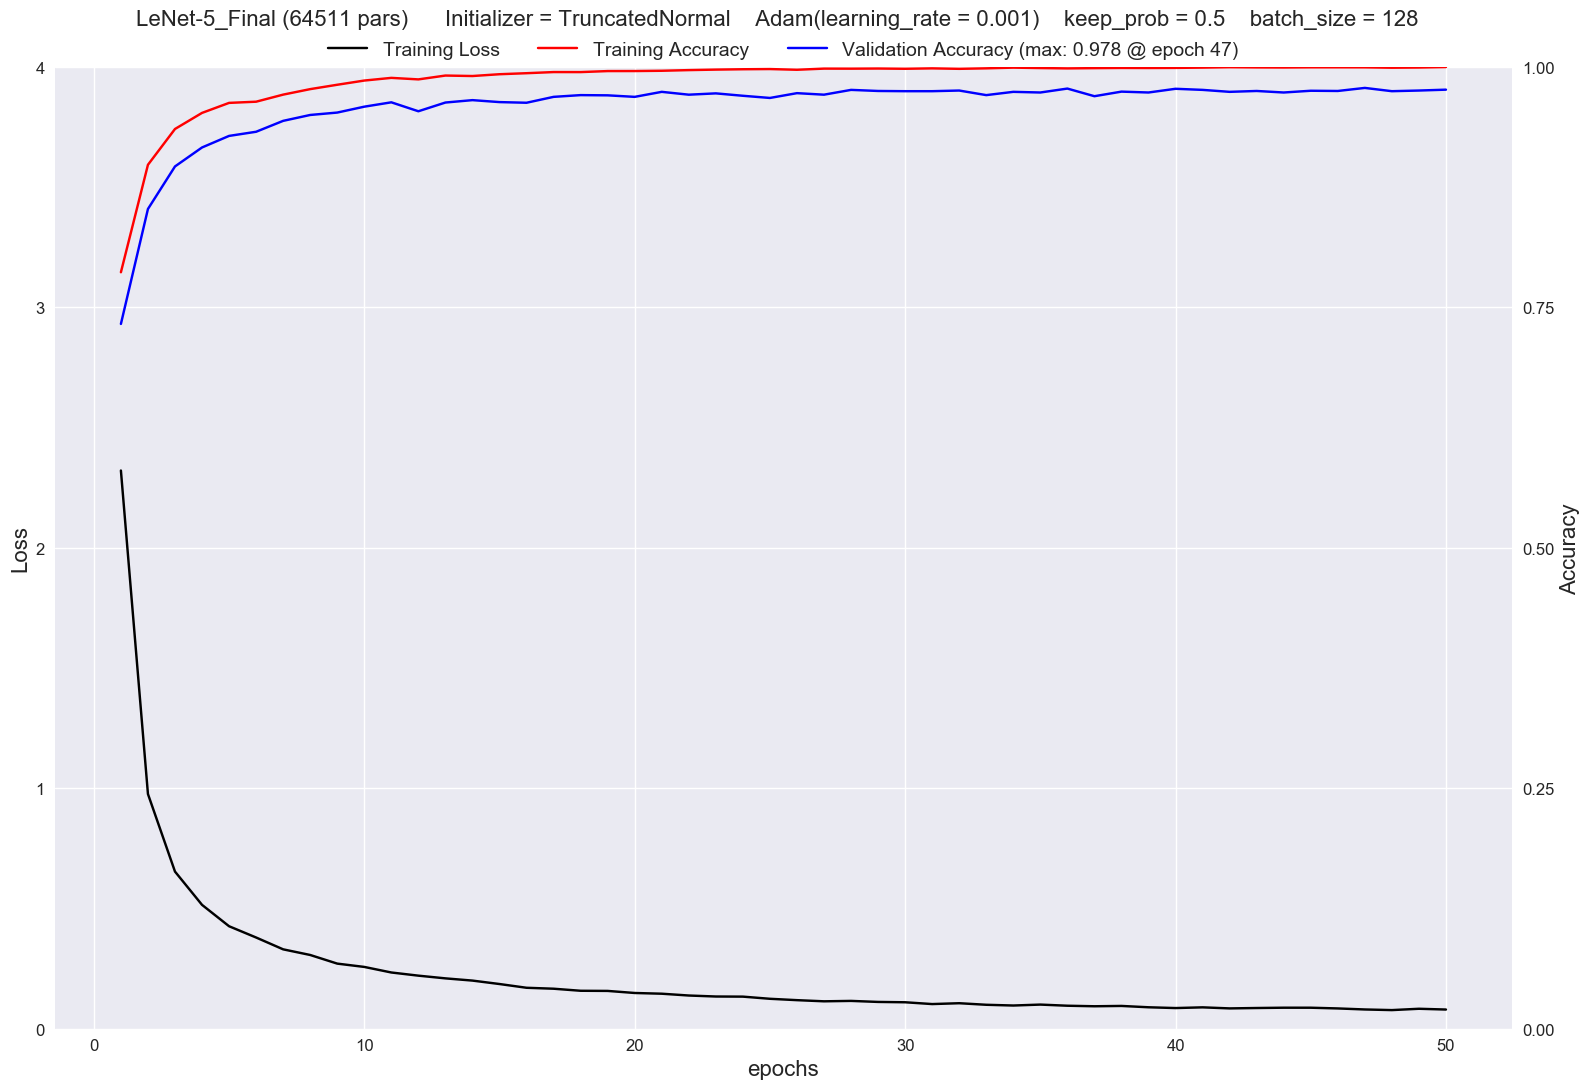

In [32]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

flag = True
if flag:
    # Parameters
    initializer = 'TruncatedNormal'
    optimizer = 'Adam'
    learning_rate = 0.001
    keep_prob = 0.5
    batch_size = 128
    epochs = 50

    tf.reset_default_graph()
    lenet = Model('LeNet-5_Final')
    lenet.compile(layers=lenet5_single_channel,
                  initializer=initializer,
                  activate_dropout=True)

    loss, train_acc, valid_acc = lenet.train(
        train_data=(preprocess(x_train), y_train),
        valid_data=(preprocess(x_valid), y_valid),
        optimizer=optimizer,
        learning_rate=learning_rate,
        keep_prob=keep_prob,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1,
        save=True)

    collector = Collector()
    collector.collect(lenet, loss, train_acc, valid_acc)
    plot_pipeline("LeNet-5_Final", collector)

In [35]:
# Evaluate test set
flag = True
data = preprocess(x_test), y_test
if flag:
    tf.reset_default_graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    with tf.Session(config=config) as session:
        lenet = Model()
        lenet.restore(checkpoint="models/LeNet-5_Final.ckpt-47")
        acc = lenet.evaluate(*data)
        print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9583


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

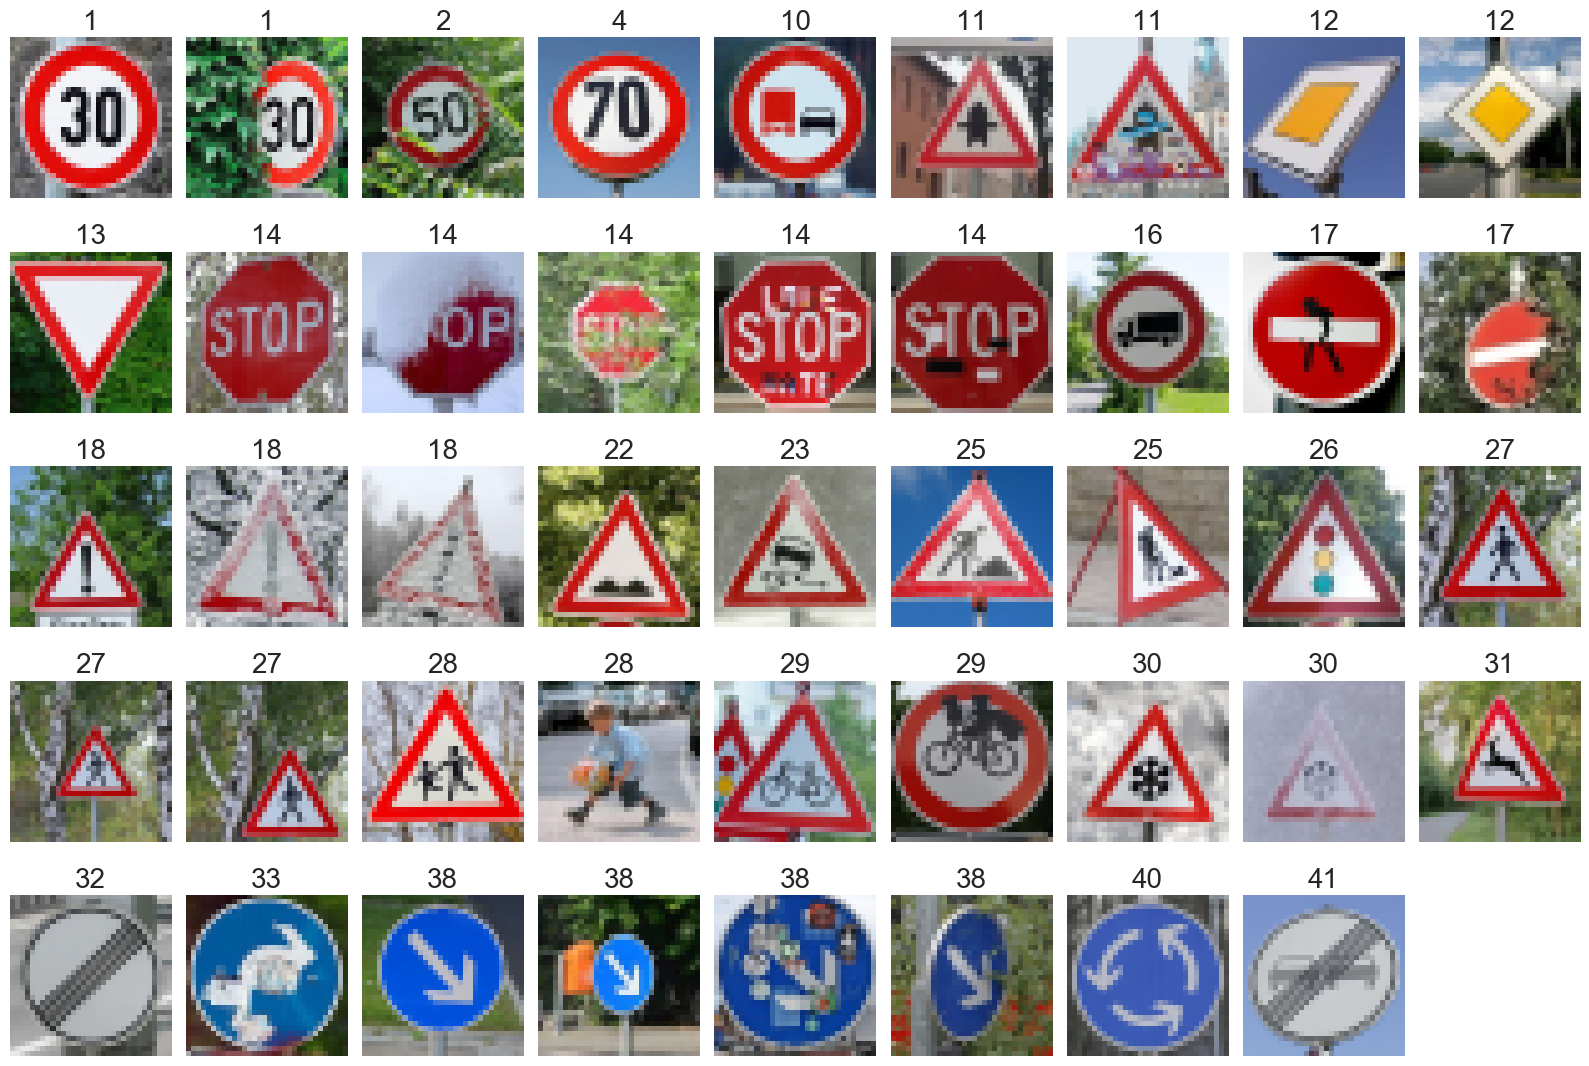

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
new_test_data = x_test_new, y_test_new = load_data("additional_signs/additional_signs.p")
plot_new_images(x_test_new, y_test_new)

### Predict the Sign Type for Each Image and Analyze Performance


Accuracy on new test signs: 70.45%



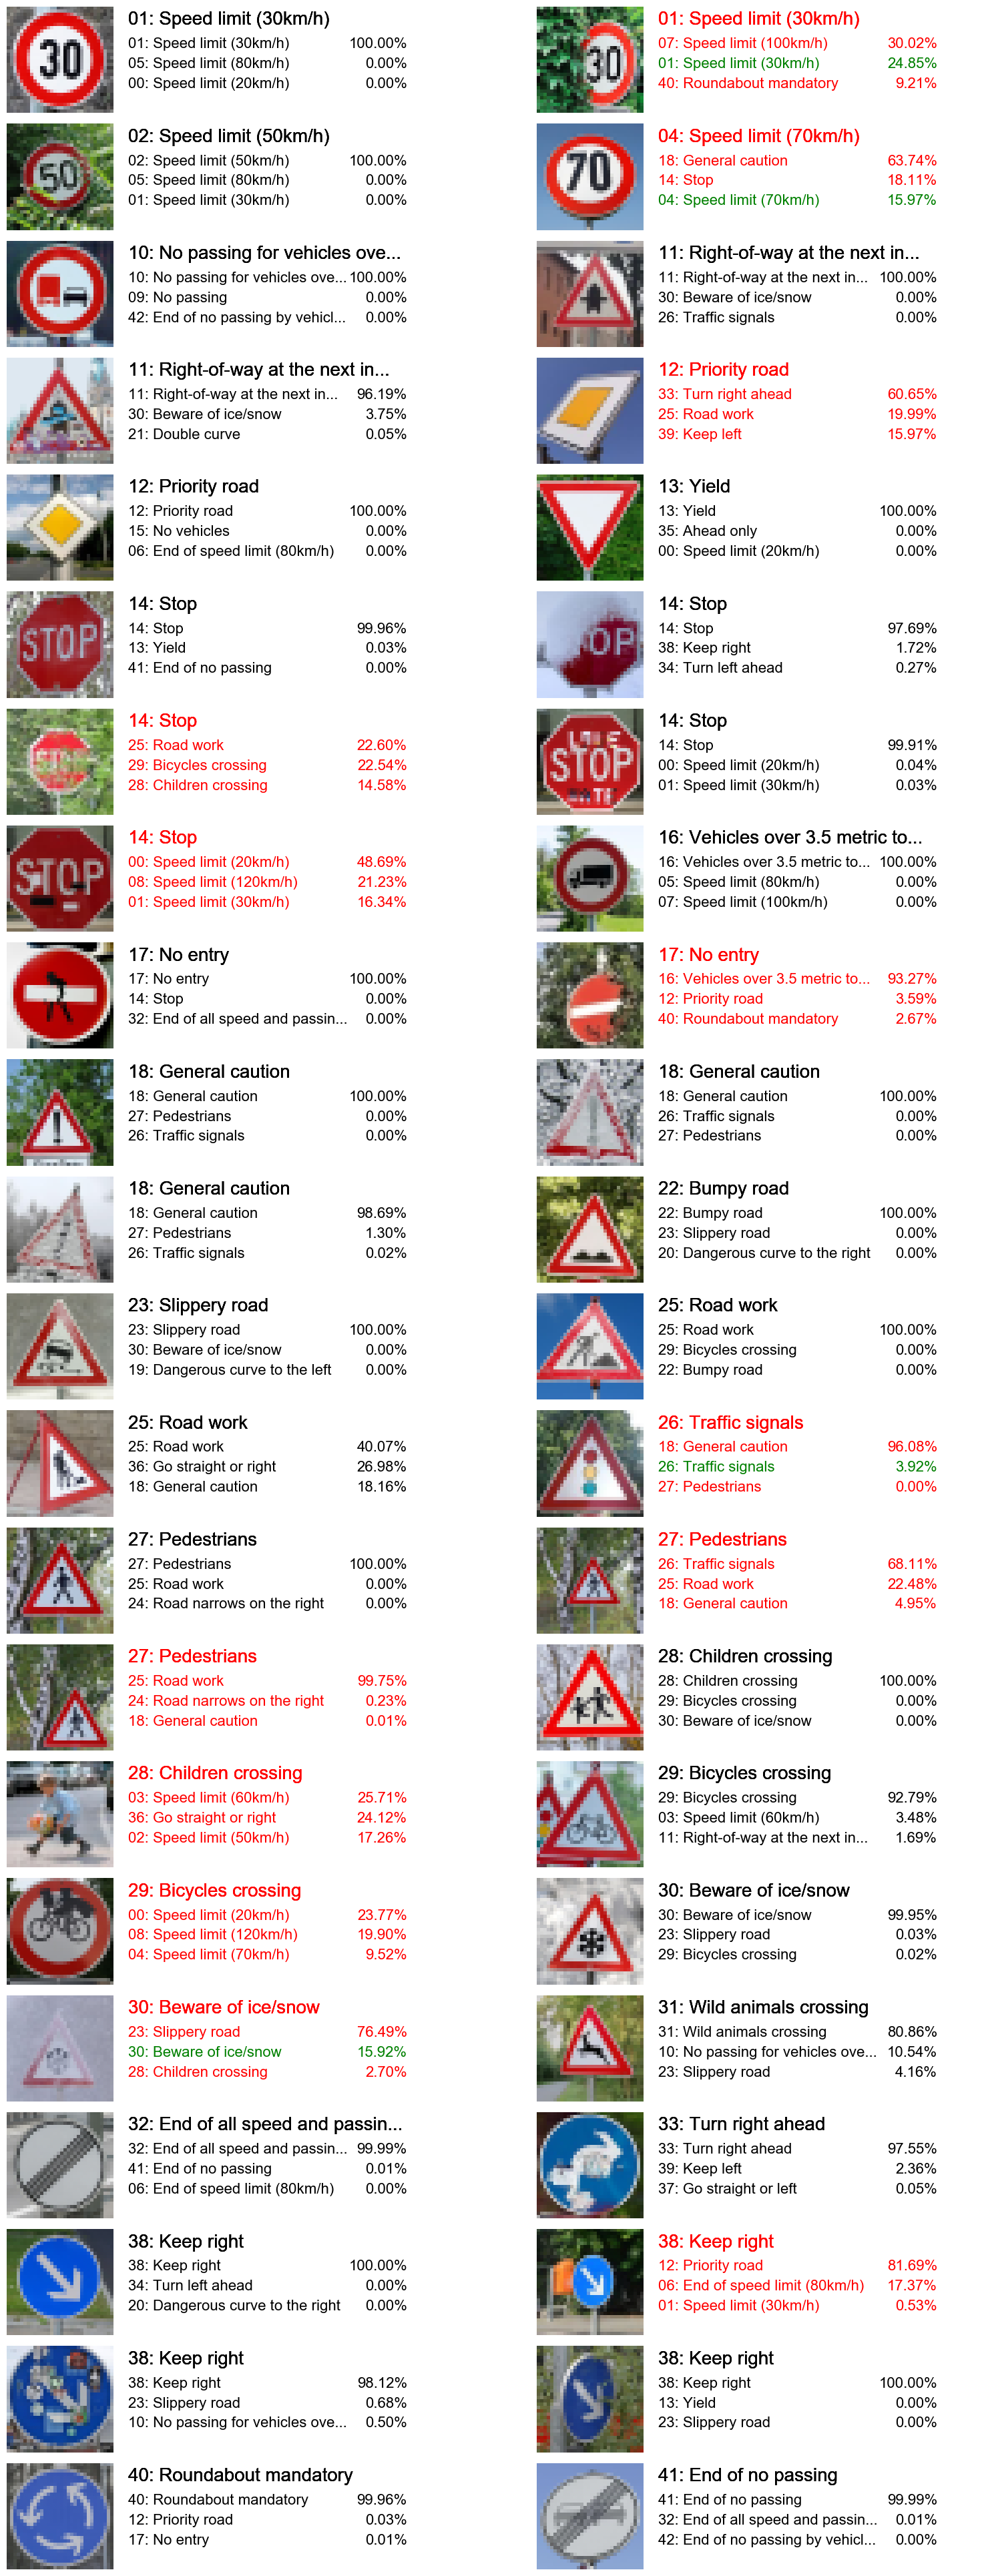

In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Predict new test images
flag = True
if flag:
    tf.reset_default_graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    with tf.Session(config=config) as session:
        lenet = Model()
        lenet.restore(checkpoint="models/LeNet-5_Final.ckpt-47")
        acc = lenet.evaluate(preprocess(x_test_new), y_test_new)
        print(f"\nAccuracy on new test signs: {acc * 100:.2f}%\n")            
        top_k_probs, top_k_preds = lenet.predict(
            preprocess(x_test_new), k=3)

    plot_predictions(x_test_new, y_test_new, top_k_probs, top_k_preds,
                     sign_names)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")